In [2]:
import pandas as pd
import matplotlib.pyplot as plt

stock_raw = pd.read_parquet('/Users/zapashniysergey/Downloads/vs code docs /stock_raw.parquet', engine='pyarrow')
stock = pd.read_parquet('/Users/zapashniysergey/Downloads/vs code docs /stock.parquet', engine='pyarrow')
currency_raw = pd.read_parquet('/Users/zapashniysergey/Downloads/vs code docs /currency_raw.parquet', engine='pyarrow')
currency = pd.read_parquet('/Users/zapashniysergey/Downloads/vs code docs /currency.parquet', engine='pyarrow')


### Рассмотрим данные по валютным парам

Причины для использования цены закрытия:

Информативность: Цена закрытия отражает итоговое состояние рынка на конец торгового дня, учитывая все события и новости, произошедшие в течение дня. 
Стабильность: Цена закрытия менее подвержена краткосрочным колебаниям и шуму, чем цены открытия, минимальные и максимальные цены.
Широкое применение: Цена закрытия является стандартной метрикой для большинства финансовых анализов и моделей прогнозирования.

In [3]:
currency = currency.filter(regex='Close', axis=1)

удаляем валютные пары с наибольшим числом пропусков

In [4]:
duplicated = []

for column in currency.columns:
    if currency[column].duplicated().sum() > 200:
        print(column)
        duplicated.append(column)

USDXCD=X_Close
USDAWG=X_Close
USDBMD=X_Close
USDCDF=X_Close
USDGMD=X_Close
USDIRR=X_Close
USDMVR=X_Close
USDMRU=X_Close
USDMZN=X_Close
USDQAR=X_Close
USDSOS=X_Close
USDSDG=X_Close
USDTMT=X_Close
USDAED=X_Close
USDYER=X_Close


In [5]:
currency.drop(columns=duplicated, inplace=True)

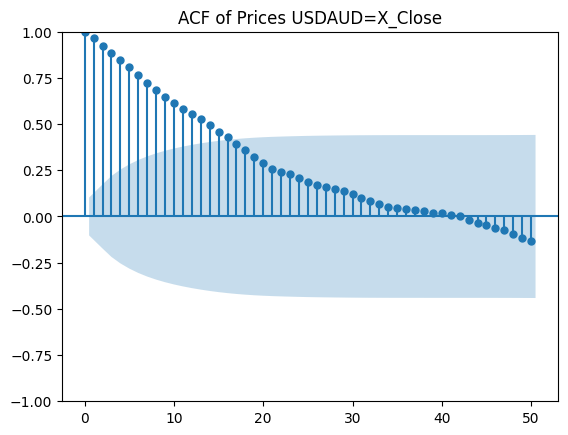

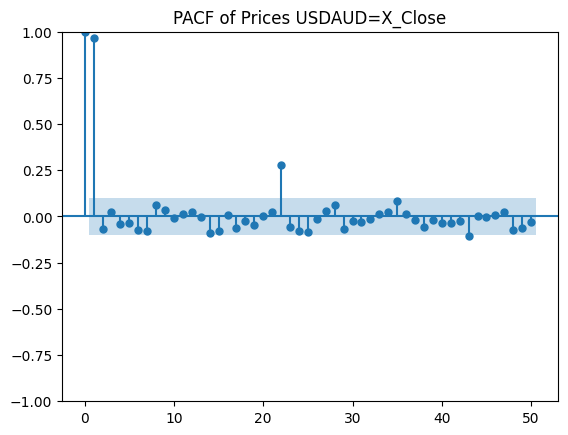

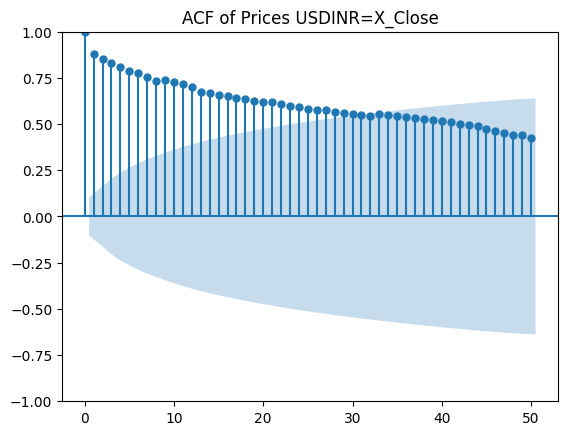

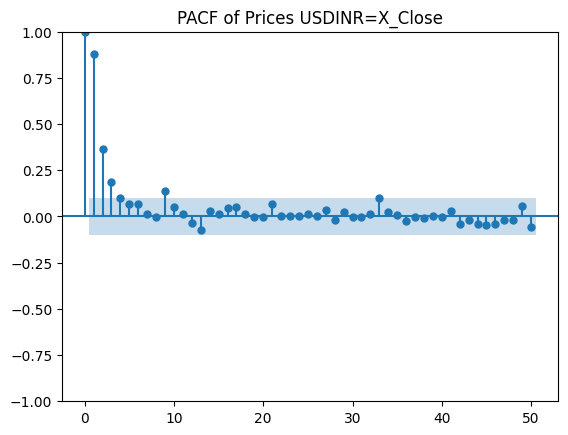

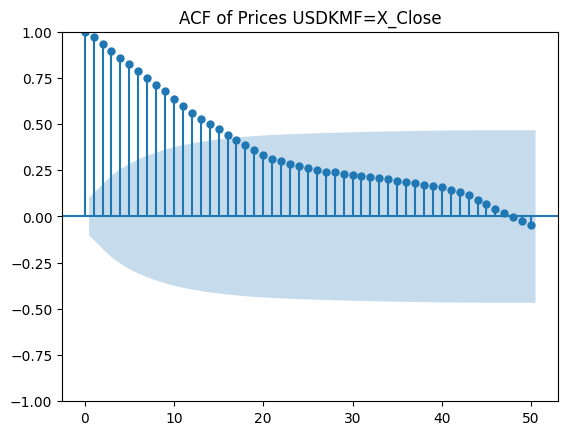

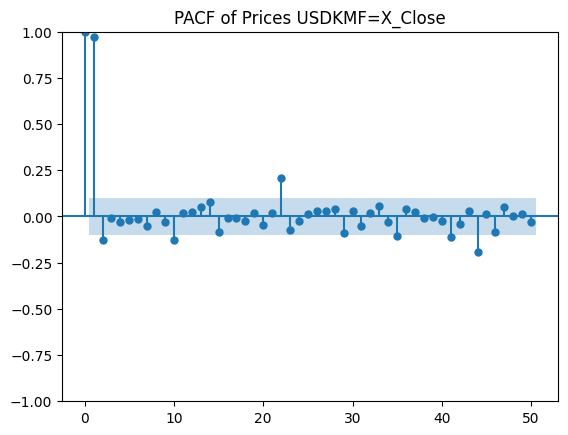

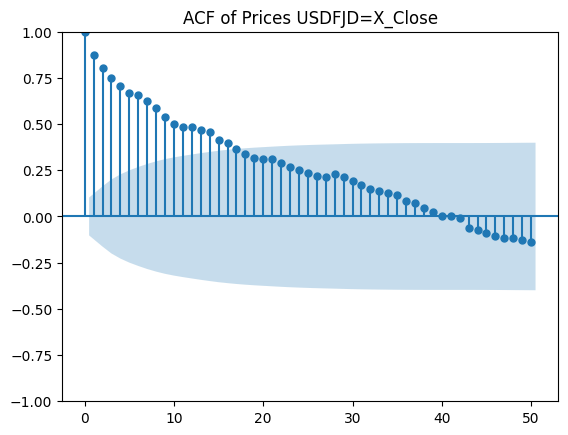

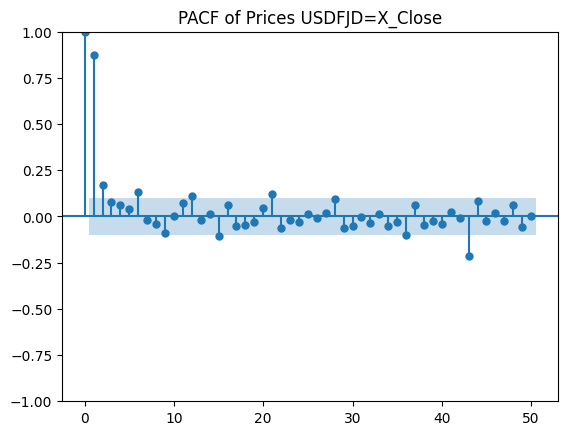

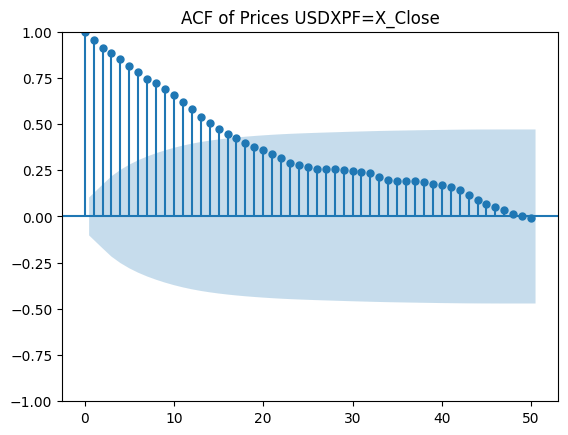

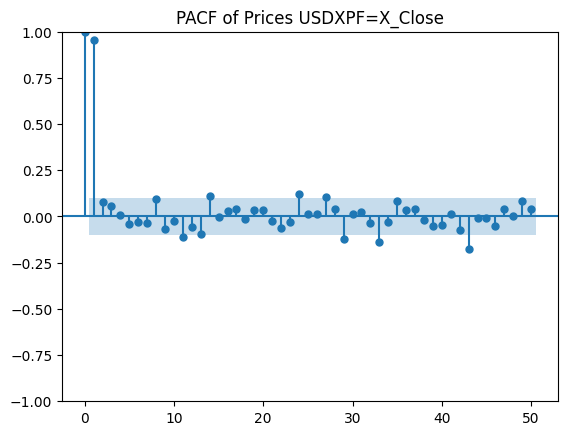

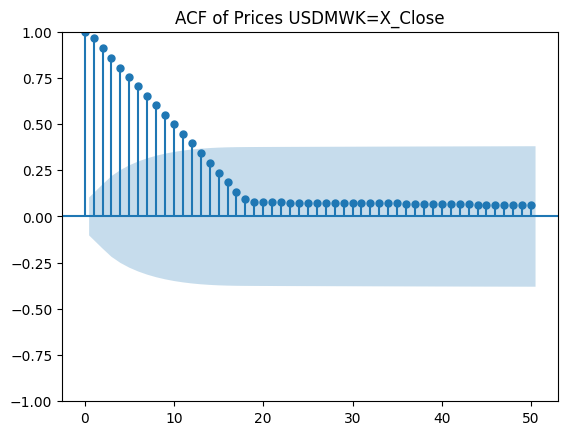

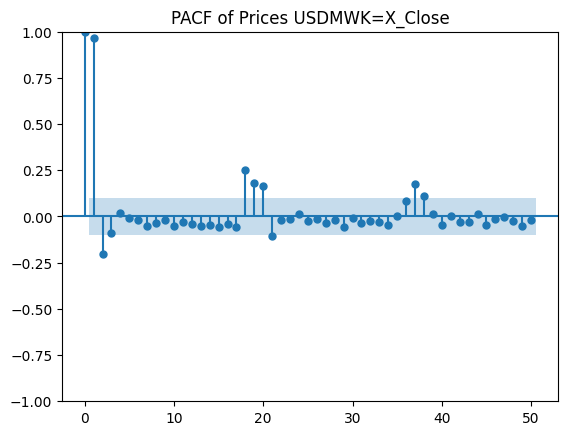

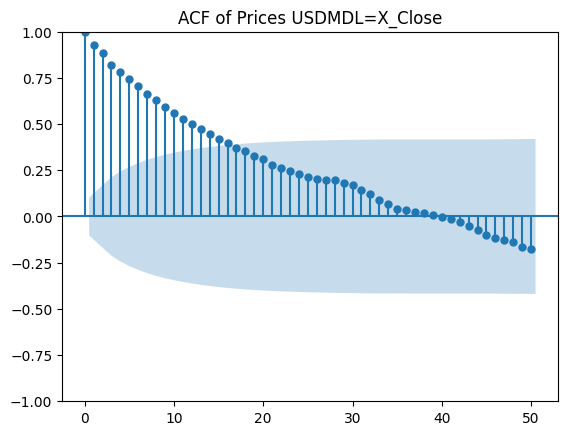

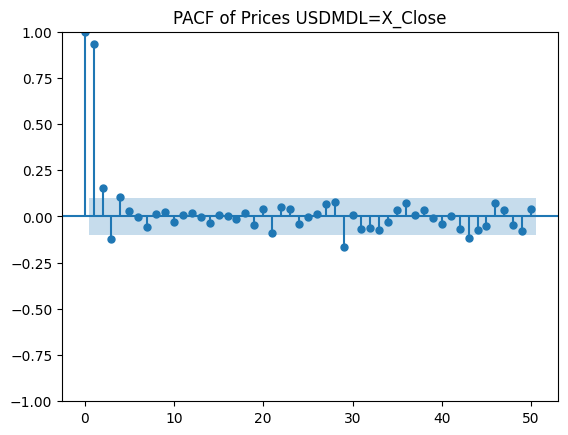

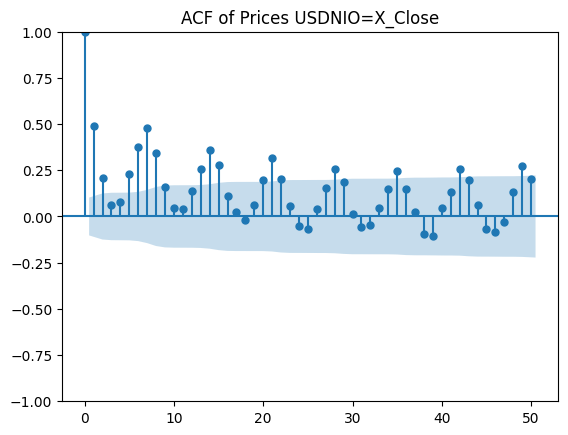

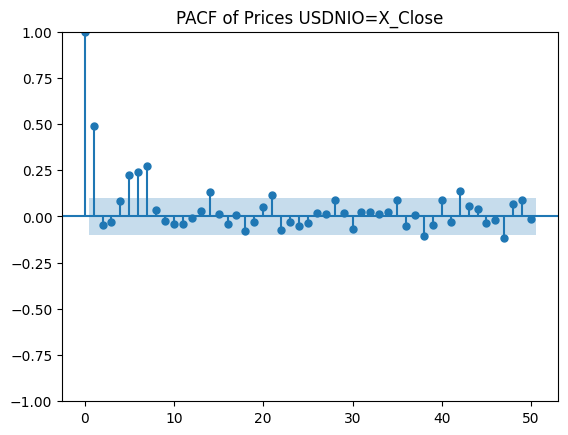

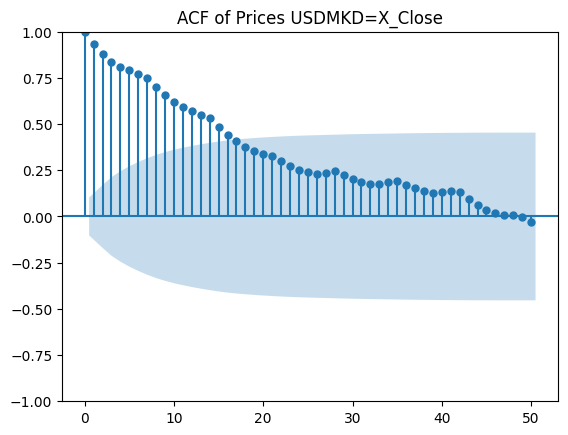

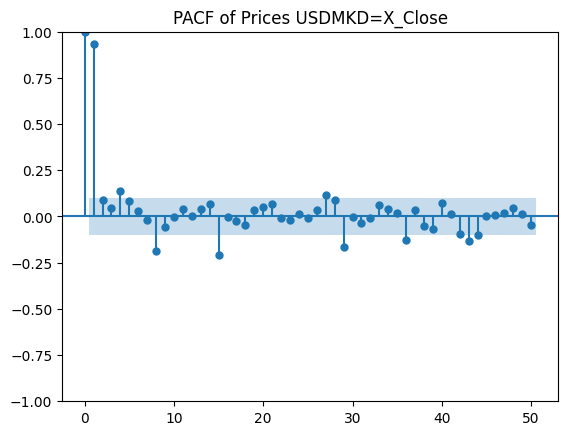

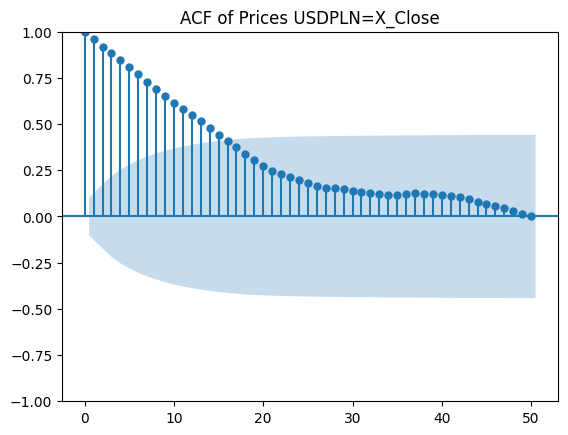

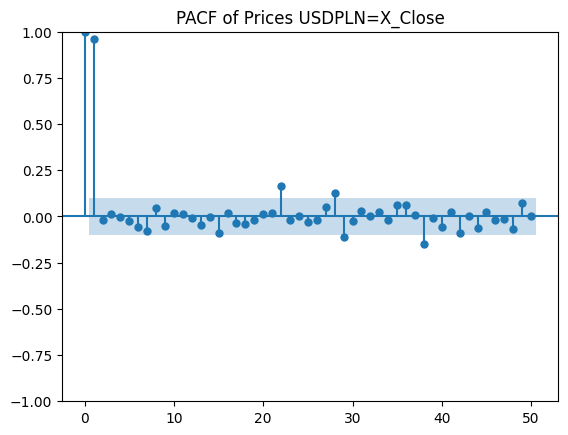

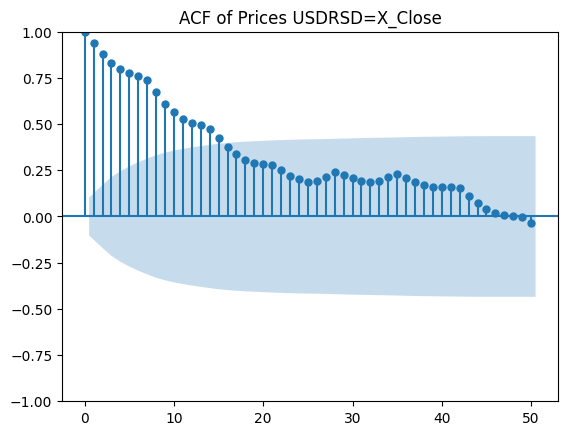

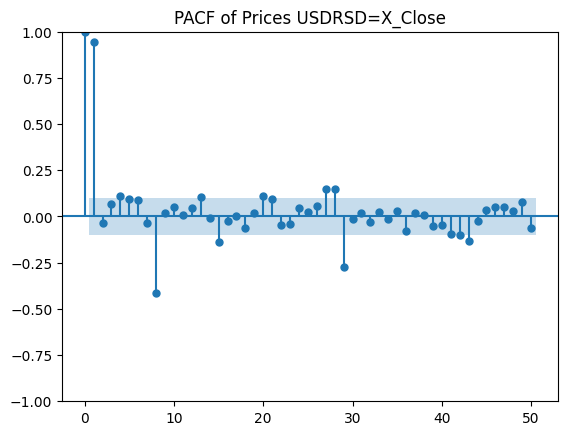

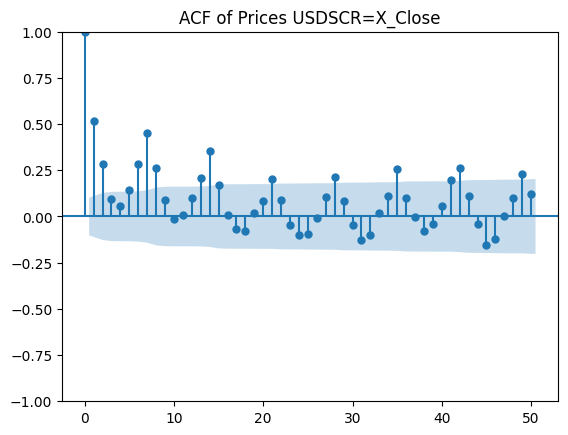

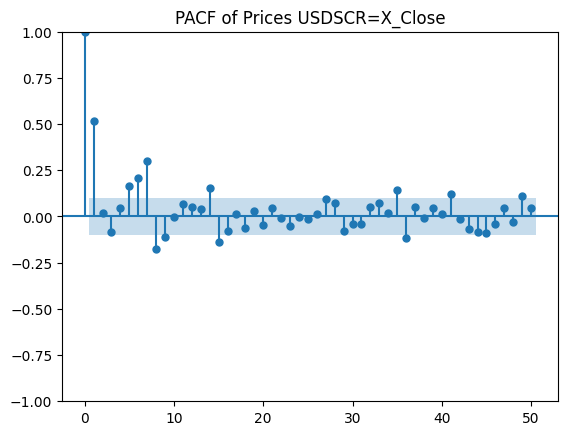

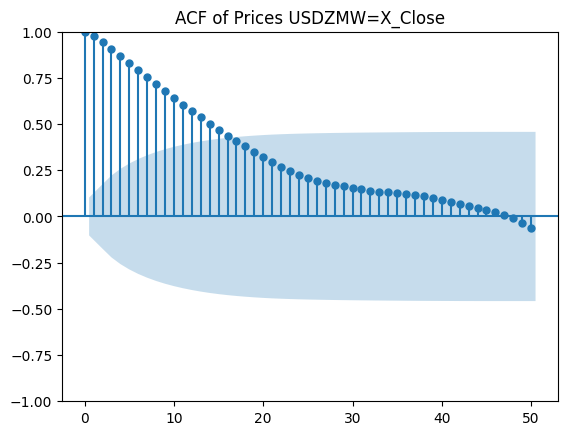

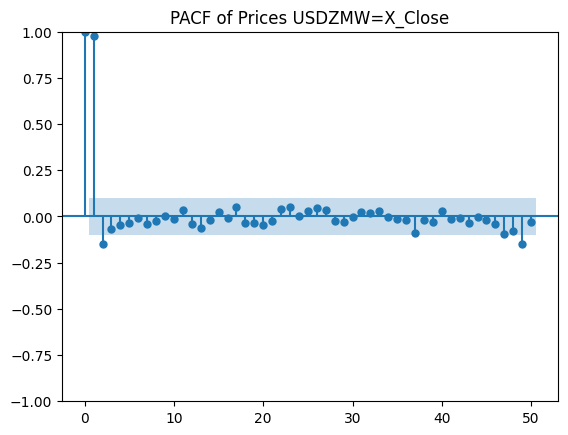

,USDAUD=X_Close,USDINR=X_Close,USDKMF=X_Close,USDFJD=X_Close,USDXPF=X_Close,USDMWK=X_Close,USDMDL=X_Close,USDNIO=X_Close,USDMKD=X_Close,USDPLN=X_Close,USDRSD=X_Close,USDSCR=X_Close,USDZMW=X_Close
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.963337,0.877219,0.969468,0.873720,0.952547,0.963202,0.929510,0.490952,0.933078,0.959725,0.941046,0.517029,0.973992
2,0.923482,0.851274,0.932956,0.803298,0.914328,0.914279,0.883749,0.207933,0.881582,0.919484,0.881528,0.282223,0.941705
3,0.886622,0.828802,0.896475,0.748355,0.881917,0.859399,0.821521,0.064508,0.837196,0.882020,0.832683,0.093334,0.906286
4,0.848937,0.807044,0.859700,0.705594,0.850455,0.805959,0.781947,0.077059,0.810881,0.846056,0.798840,0.054966,0.868965


,USDAUD=X_Close,USDINR=X_Close,USDKMF=X_Close,USDFJD=X_Close,USDXPF=X_Close,USDMWK=X_Close,USDMDL=X_Close,USDNIO=X_Close,USDMKD=X_Close,USDPLN=X_Close,USDRSD=X_Close,USDSCR=X_Close,USDZMW=X_Close
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.965976,0.879623,0.972124,0.876114,0.955156,0.965841,0.932056,0.492297,0.935634,0.962354,0.943624,0.518446,0.976661
2,-0.068079,0.363358,-0.126303,0.172686,0.080162,-0.201708,0.151410,-0.043927,0.088405,-0.021512,-0.037009,0.020497,-0.151451
3,0.025308,0.186858,-0.008240,0.078938,0.056310,-0.088126,-0.121937,-0.027484,0.043284,0.015454,0.065173,-0.082947,-0.069810
4,-0.038027,0.099811,-0.027701,0.064012,0.007155,0.016761,0.107348,0.085129,0.137549,-0.000948,0.109409,0.045268,-0.047569


In [6]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

def is_stationary(series):
    result = adfuller(series)
    p_value = result[1]
    return p_value < 0.05

def kpss_test(series, regression='c', **kwargs):
    result = kpss(series, **kwargs)
    return result[1] < 0.05

stationarity_dict = {}
kpss_dict = {}

for column in currency.columns:
    stationarity_dict[column] = is_stationary(currency[column])
    kpss_dict[column] = kpss_test(currency[column])
    
#display(stationarity_dict)

adf_stationarity = pd.DataFrame(list(stationarity_dict.items()), columns=['CurrencyPair', 'Stationary'])
kpss_stationarity = pd.DataFrame(list(kpss_dict.items()), columns=['CurrencyPair', 'Stationary'])
stationarity_prob = adf_stationarity.merge(kpss_stationarity, on='CurrencyPair')
stationarity = stationarity_prob[(stationarity_prob['Stationary_x'] == True) & (stationarity_prob['Stationary_y'] == True)]
#display(stationarity)


def calculate_acf(series, lags=50):
    acf_values = acf(series, nlags=lags)
    return acf_values

def calculate_pacf(series, lags=50):
    pacf_values = pacf(series, nlags=lags)
    return pacf_values

acf_df = pd.DataFrame()
pacf_df = pd.DataFrame()

for column in currency[stationarity['CurrencyPair']]:
    acf_values = calculate_acf(currency[column])
    acf_df[column] = acf_values
    pacf_values = calculate_pacf(currency[column])
    pacf_df[column] = pacf_values
    # ACF
    plot_acf(currency[column], lags=50)
    plt.title(f'ACF of Prices {column}')
    plt.show()
    plot_pacf(currency[column], lags=50)
    plt.title(f'PACF of Prices {column}')
    plt.show()

display(acf_df.head())
display(pacf_df.head())

Даже при учете того, что ряды, которые были выбраны при условии того, что тесты ADF и KPSS показали, что временные ряды являются стационарными, графики с ACF и PACF говорят о том, что не всегда тесты ADF и KPSS могут говорить о полной стационарности рядов, что необходимо брать во внимание и не полагаться только на один критерий проверки

In [102]:
print(f"Это при учете того, что данные тесты показали стационарными только {round((stationarity.shape[0] / currency.shape[1]) * 100, 3)}% валютных пар")

Это при учете того, что данные тесты показали стационарными только 12.381% валютных пар


Попробуем привести ряды к стационарному виду 

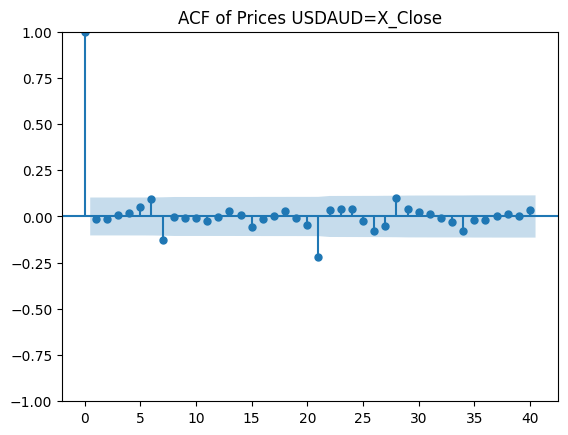

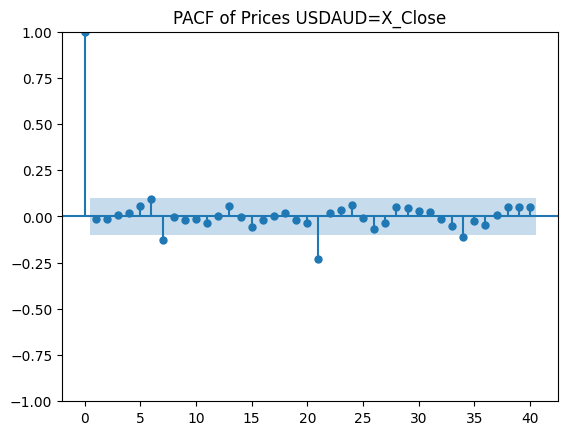

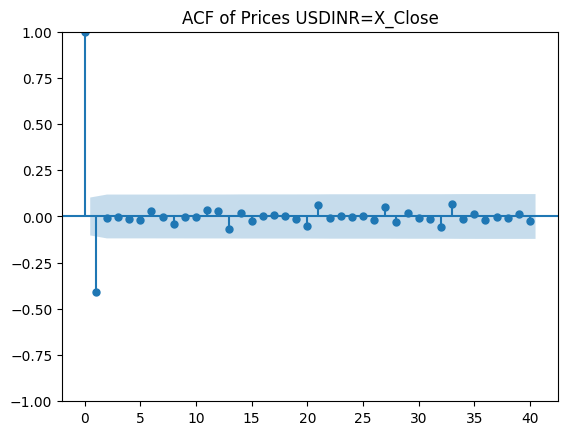

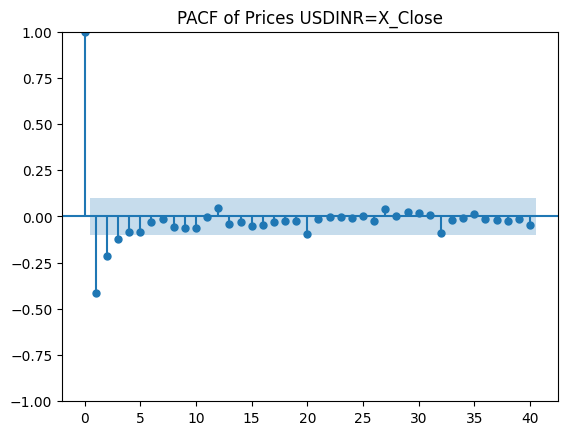

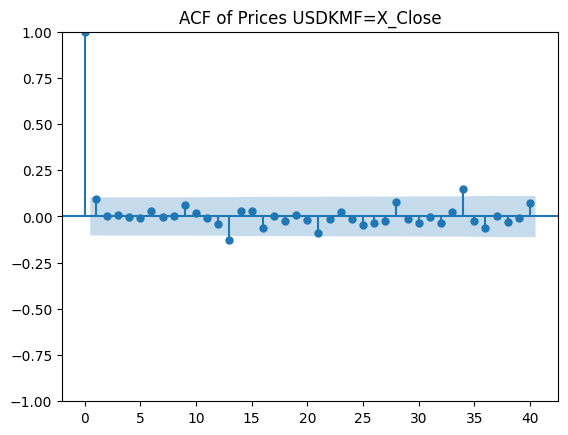

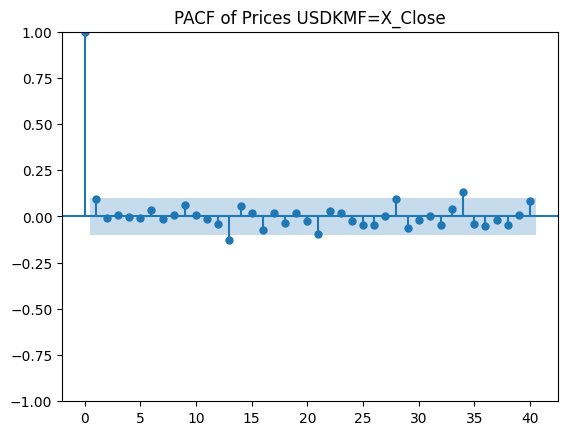

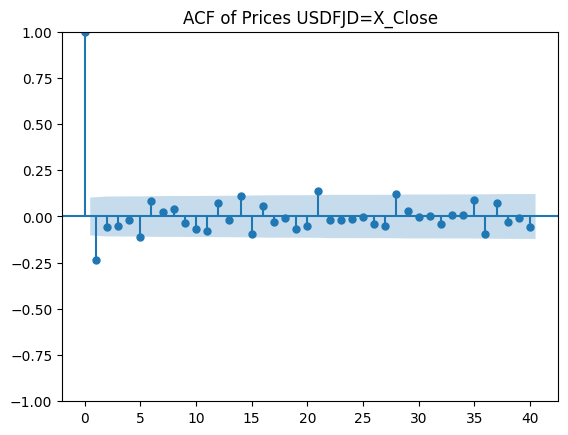

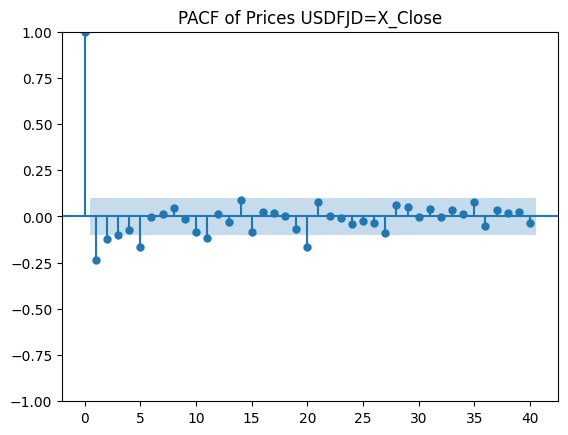

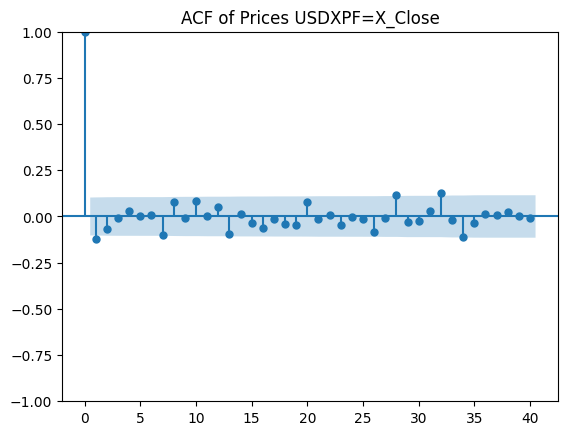

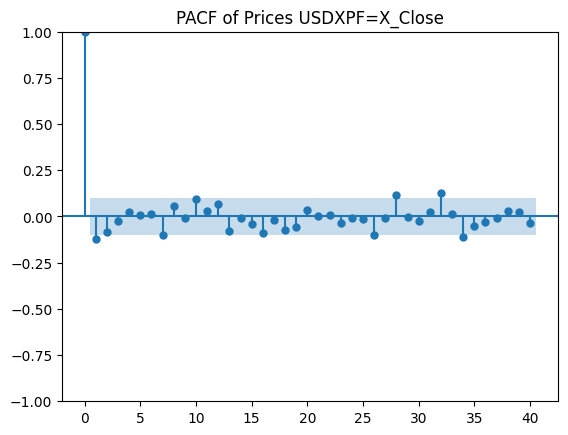

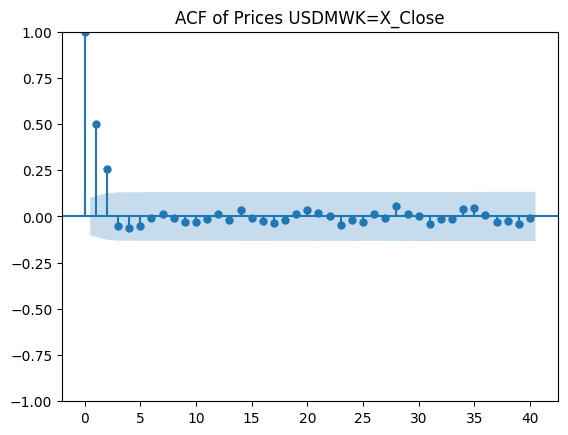

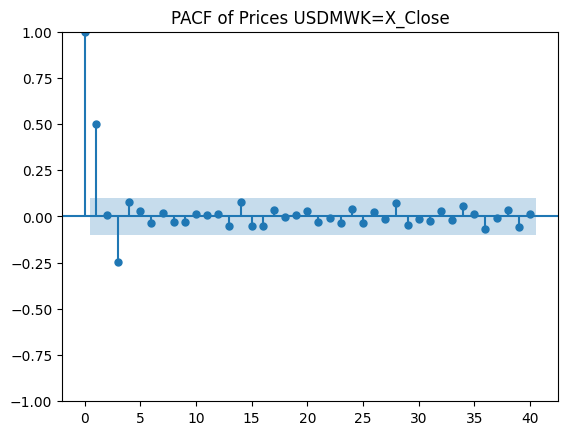

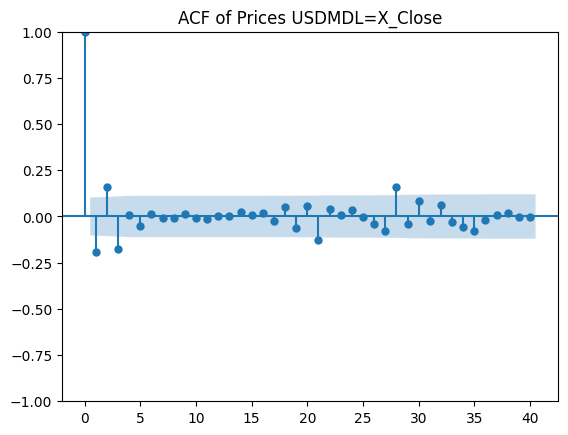

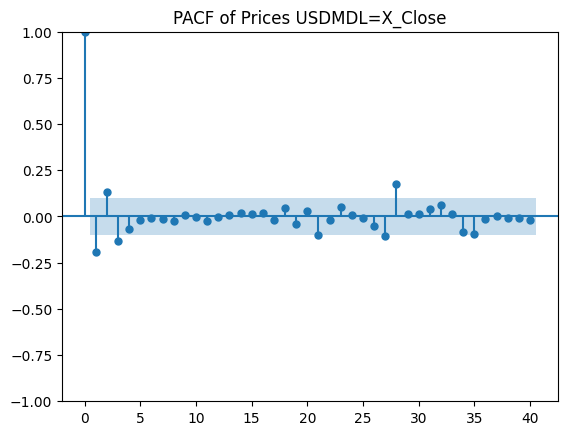

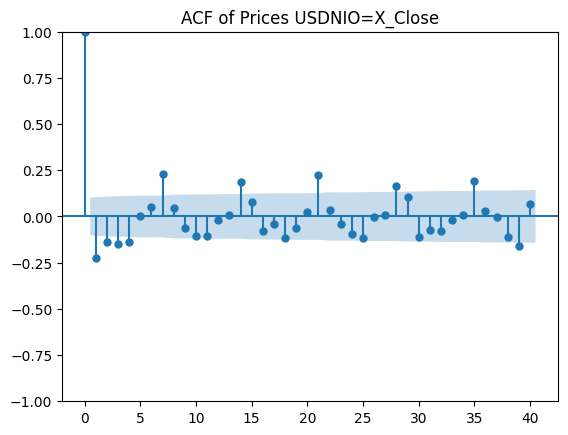

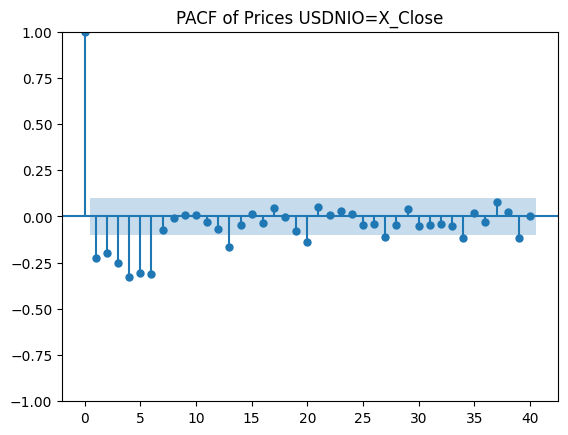

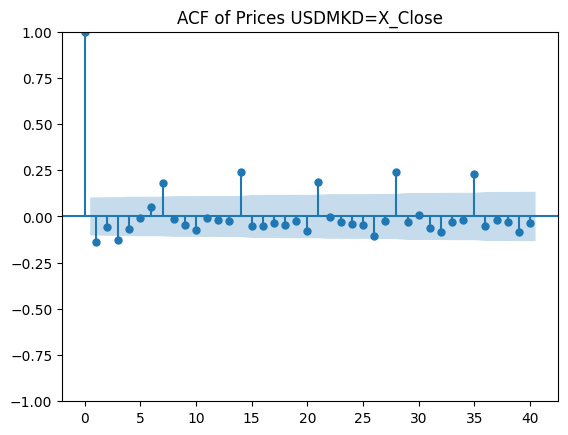

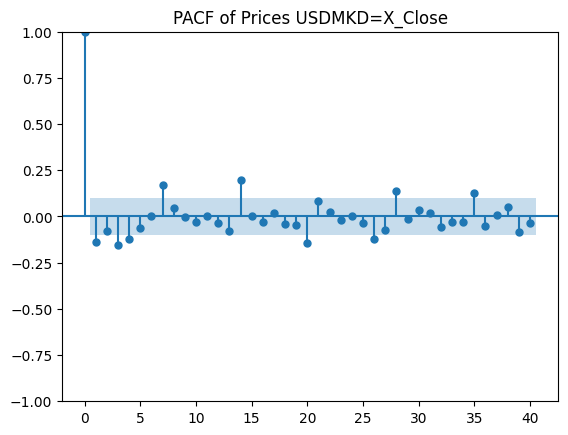

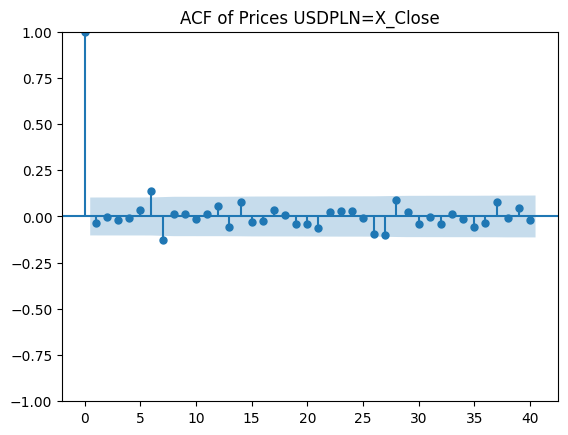

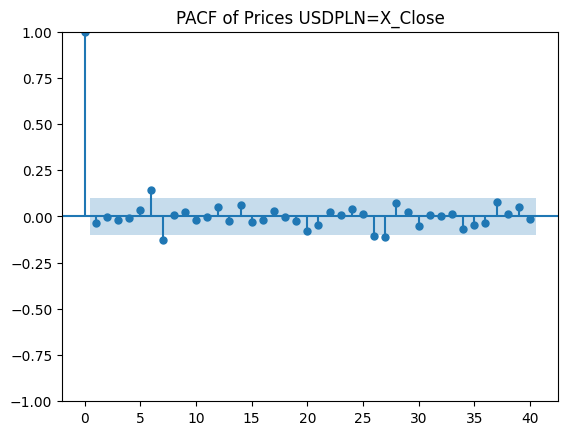

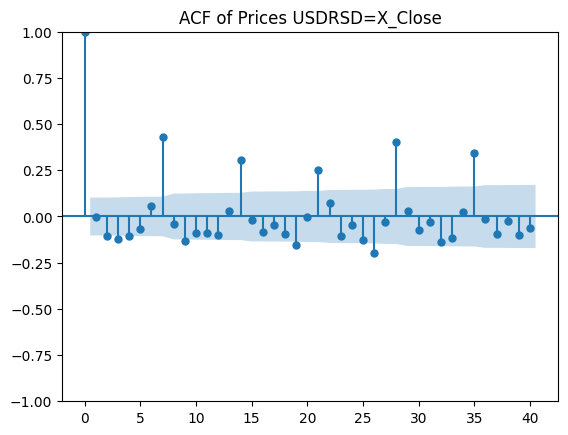

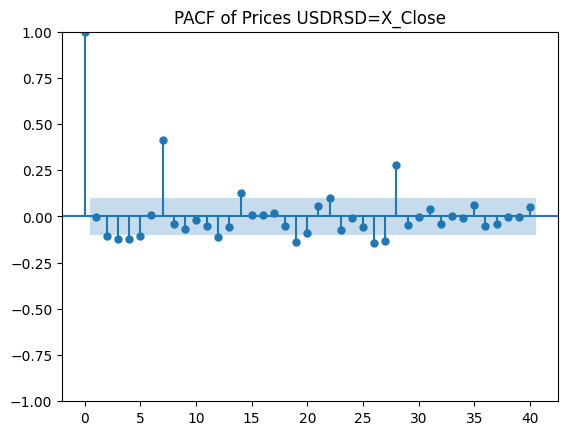

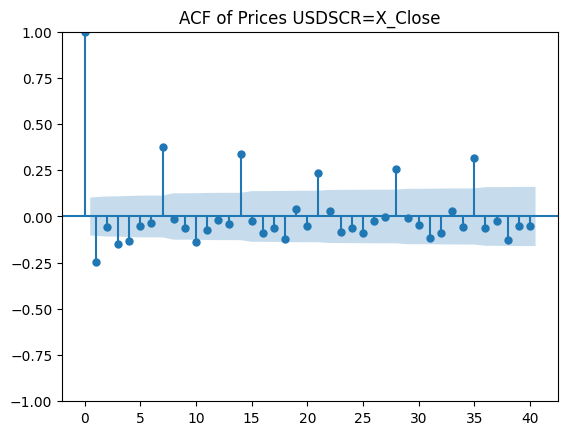

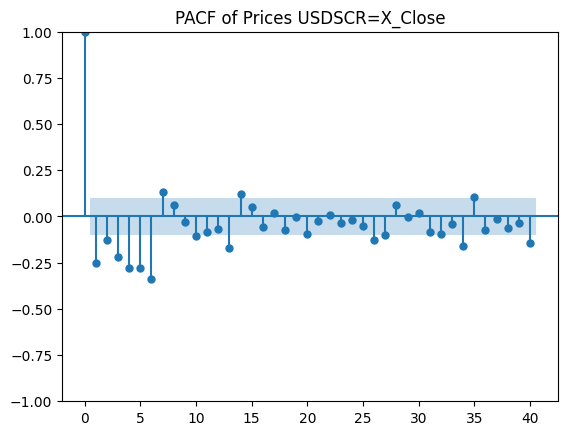

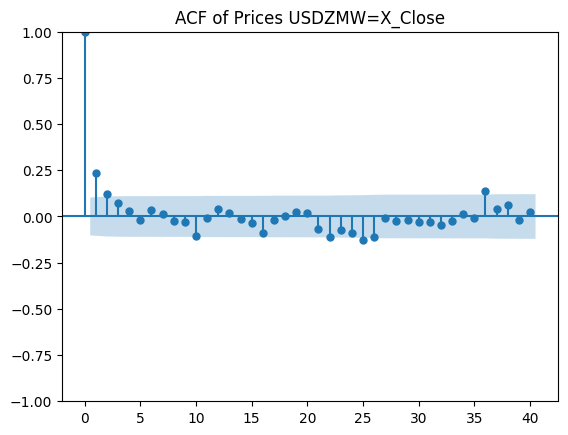

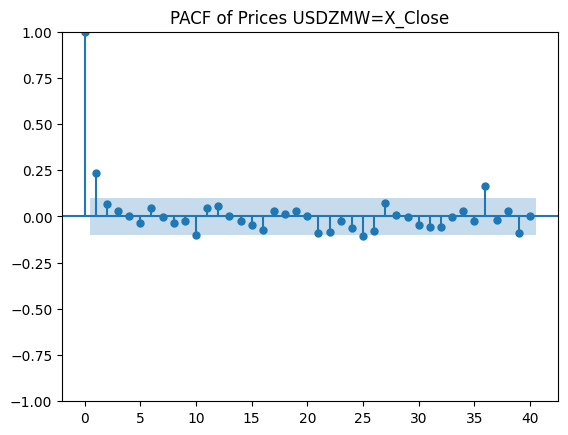

In [89]:
# Функция для дифференцирования временного ряда
def differencing(series, order=1):
    return series.diff(order).dropna()

# Функция для логарифмирования временного ряда
def log_transform(series):
    return np.log(series)

# Функция для удаления тренда с помощью линейной регрессии
def detrend(series):
    x = np.arange(len(series))
    model = np.polyfit(x, series, 1)
    trend = np.polyval(model, x)
    return series - trend



differencing_dict = {}
log_dict = {}
detrend_dict = {}
differencing_df = pd.DataFrame()
log_df = pd.DataFrame()
detrend_df = pd.DataFrame()

for column in currency.columns:
    differencing_df[column] = differencing(currency[column])
    differencing_dict[column] = is_stationary(differencing(currency[column]))
    log_df[column] = log_transform(currency[column])
    log_dict[column] = is_stationary(log_transform(currency[column]))
    detrend_df[column] = detrend(currency[column])
    detrend_dict[column] = is_stationary(detrend(currency[column]))


differencing_dict = pd.DataFrame(list(differencing_dict.items()), columns=['CurrencyPair', 'Stationary_ADF_diff'])
log_dict = pd.DataFrame(list(log_dict.items()), columns=['CurrencyPair', 'Stationary_ADF_log'])
detrend_dict = pd.DataFrame(list(detrend_dict.items()), columns=['CurrencyPair', 'Stationary_ADF_detrend'])

df_all_transform = pd.DataFrame(differencing_dict.merge(log_dict, on='CurrencyPair').merge(detrend_dict, on='CurrencyPair').merge(stationarity_prob.reset_index(drop=True), on='CurrencyPair'))
df_all_transform.columns = ['CurrencyPair', 'Stationary_ADF_diff', 'Stationary_ADF_log', 'Stationary_ADF_detrend', 'Stationary_ADF_original', 'Stationary_KPSS_original']


acf_df = pd.DataFrame()
pacf_df = pd.DataFrame()

for column in currency[stationarity['CurrencyPair']]:
    acf_values = calculate_acf(differencing_df[column])
    acf_df[column] = acf_values
    pacf_values = calculate_pacf(differencing_df[column])
    pacf_df[column] = pacf_values
    plot_acf(differencing_df[column], lags=40)
    plt.title(f'ACF of Prices {column}')
    plt.show()
    plot_pacf(differencing_df[column], lags=40)
    plt.title(f'PACF of Prices {column}')
    plt.show()

Таким образом, мы видим, что дифференцирование помогло привести ряды к стационарной форме без ложноположительных результатов, как это было ранее

In [109]:
print(f"Таким образом мы привели ряды от нестационарного вида, к стационарным и увеличили покрытие стационарными рядами на {round(((df_all_transform[df_all_transform['Stationary_ADF_diff'] == True].shape[0] / currency.shape[1]) - (stationarity.shape[0] / currency.shape[1])) * 100, 1)} %")

Таким образом мы привели ряды от нестационарного вида, к стационарным и увеличили покрытие стационарными рядами на 87.6 %


### Промежуточный вывод по валютным парам 

Даже при использовании ADF & KPSS мы можем получать нестационарный вид на ACF & PACF, что довольно сильно урезает нам возможность пользоваться всеми рядами и , соответственно, благодаря методам дифференцирования, логорифмирования, удаления тренда мы можем использовать не только 12.3 % изначально стационарных рядов (судя по ADF & KPSS, но там также встречаются ложноположительные результаты) рядов, но и добиваем % покрытия стационарными рядами до 100, что позволяет нам в последующем использовать сильно большее кол-во рядов для построения прогноза и выявления дополнительных закономерностей 


### Рассмотрим акции

Пенрвым делом избавимся от данных с дубликатами 

In [112]:
duplicated = []

for column in stock.columns:
    if stock[column].duplicated().sum() > 200:
        duplicated.append(column)
stock.drop(columns=duplicated, inplace=True)

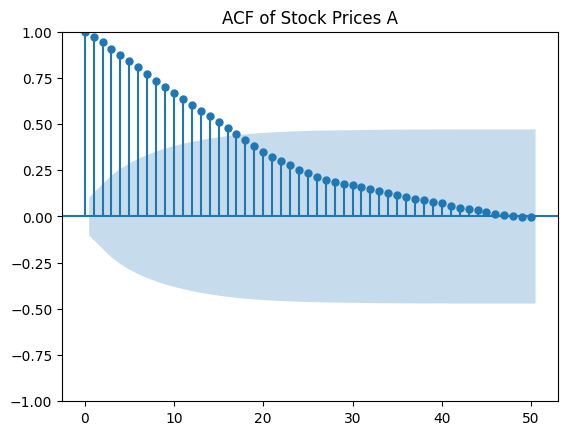

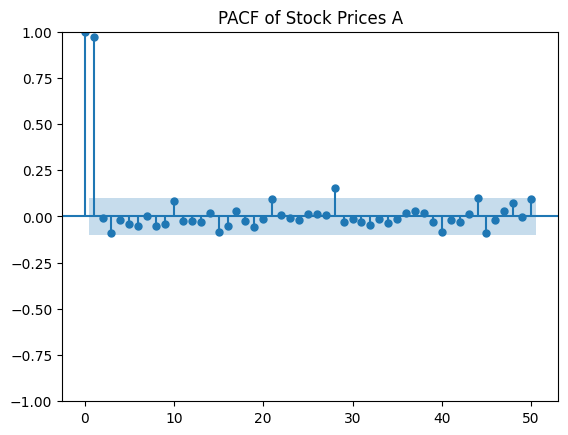

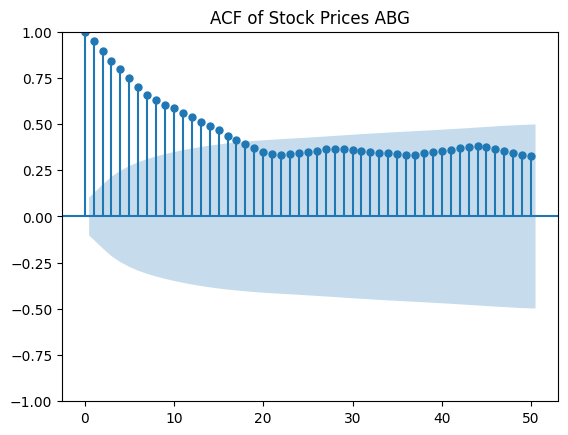

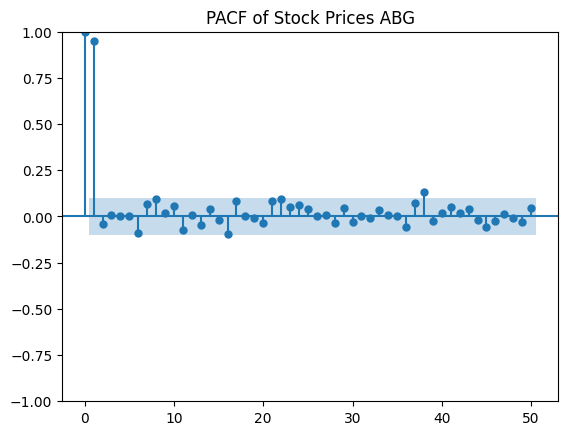

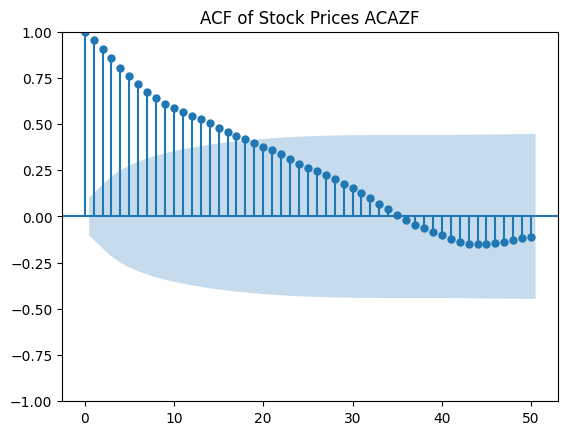

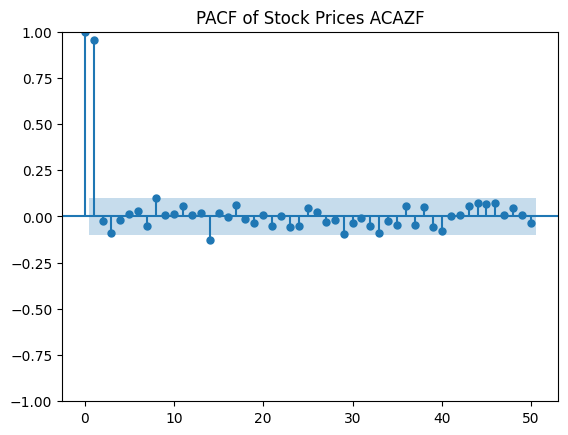

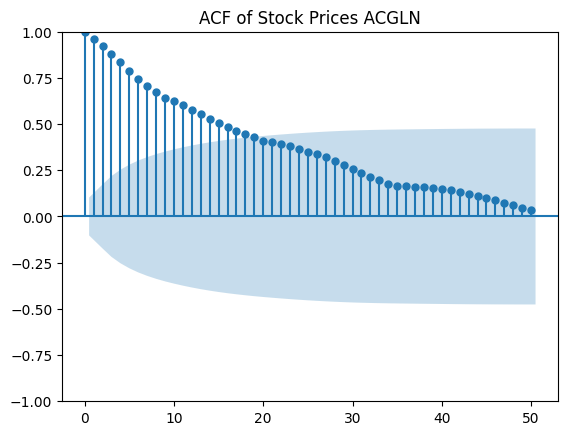

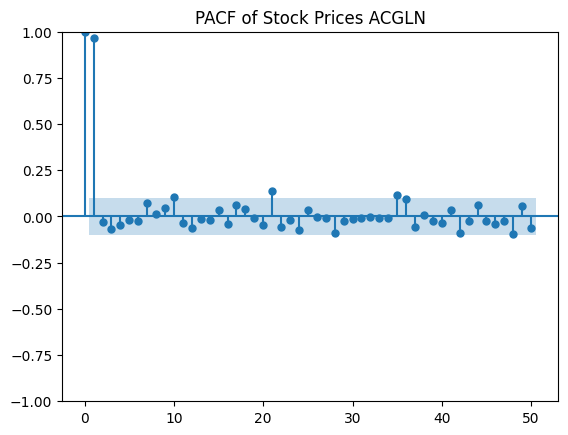

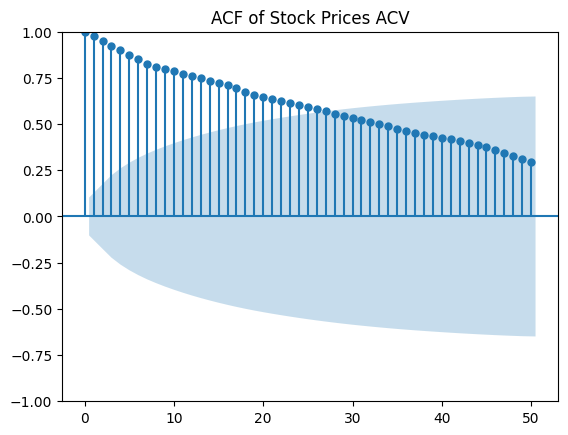

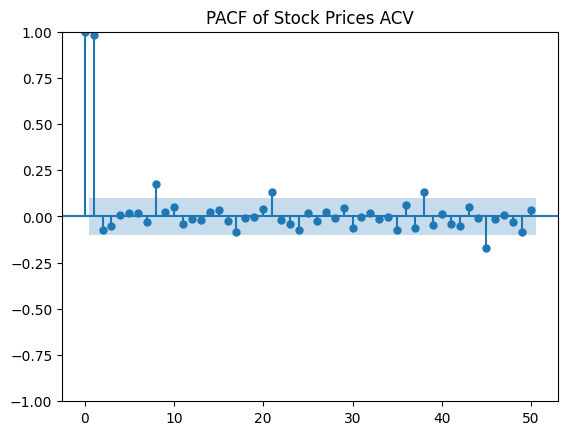

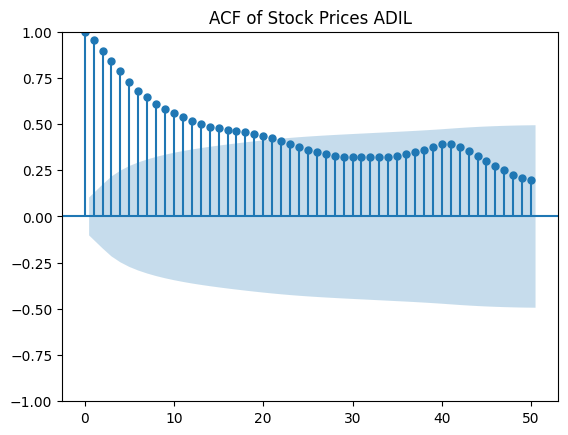

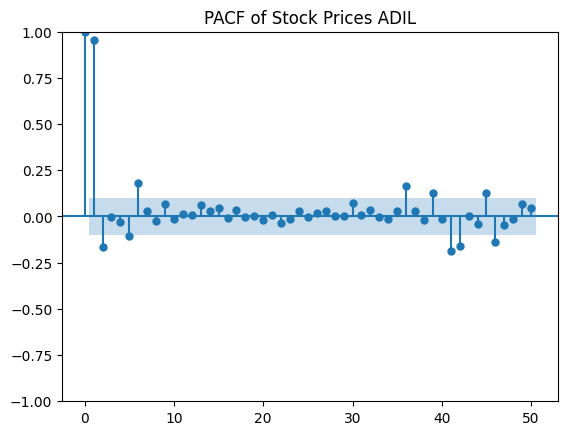

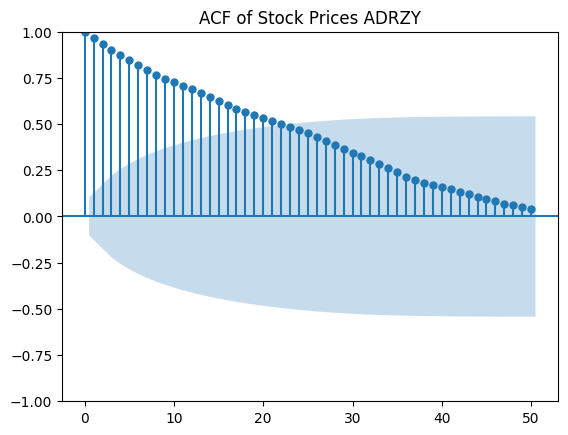

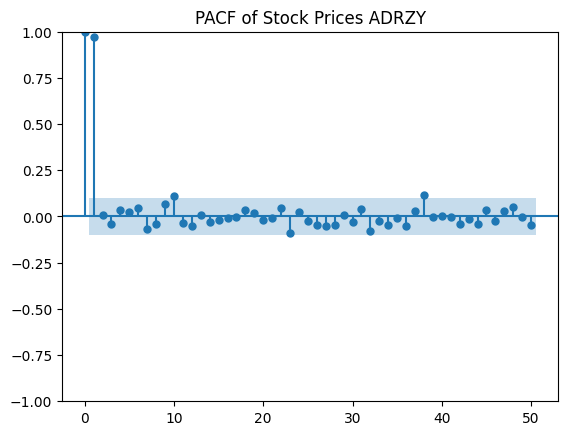

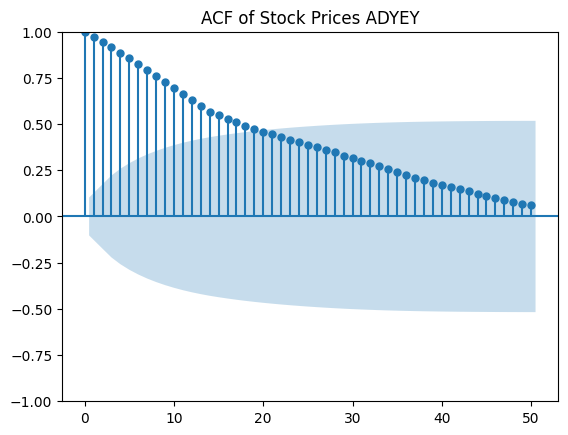

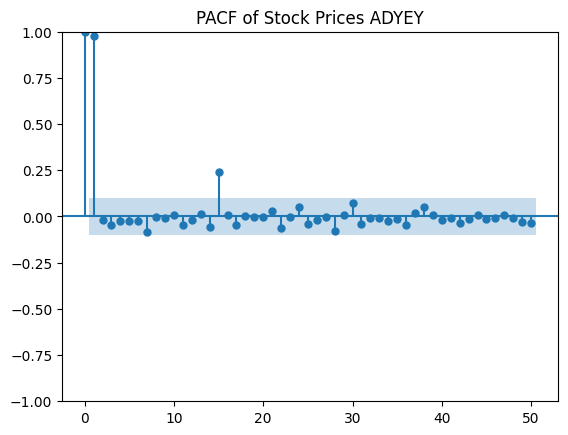

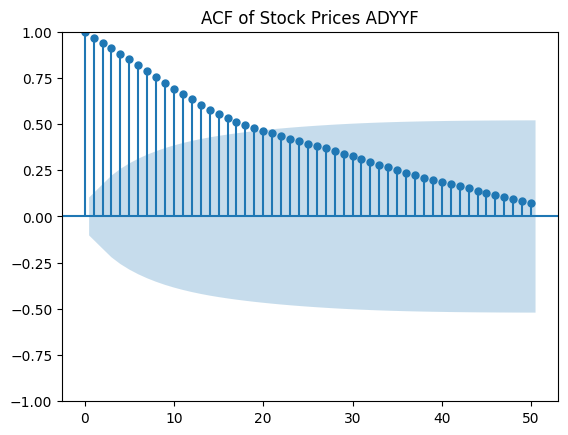

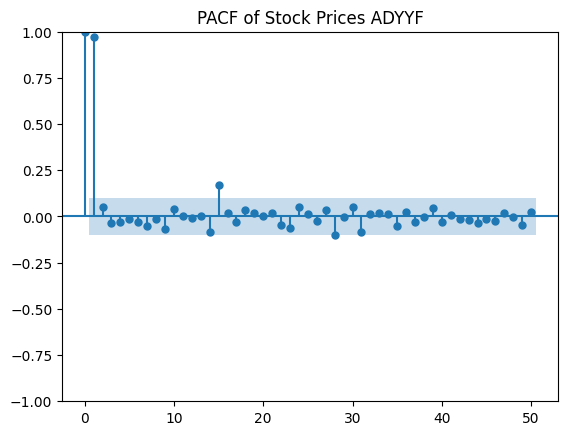

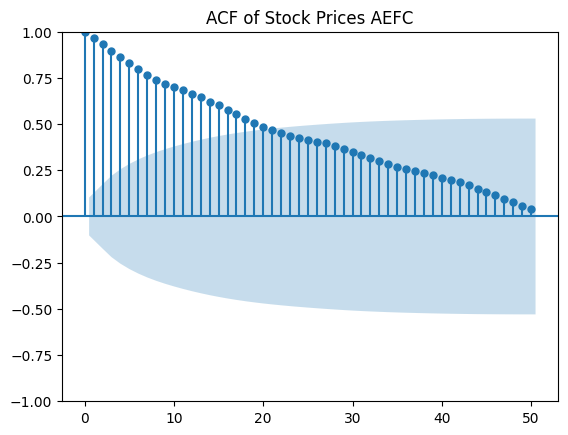

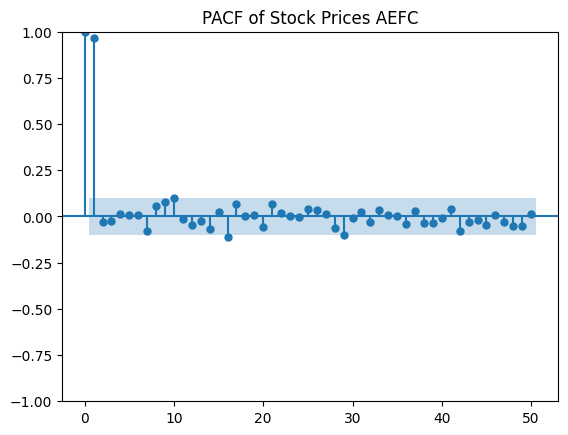

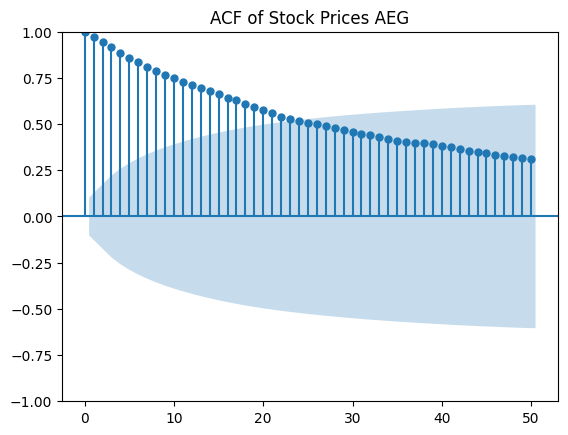

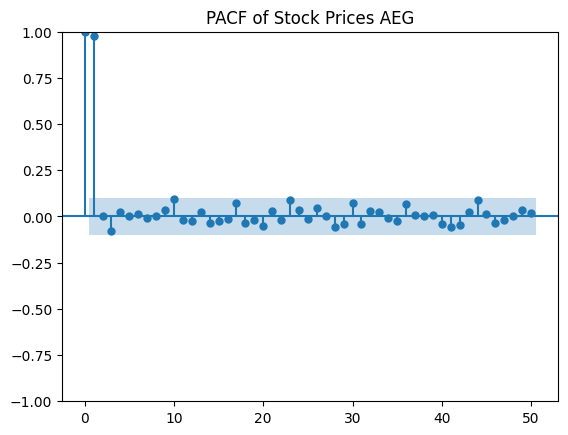

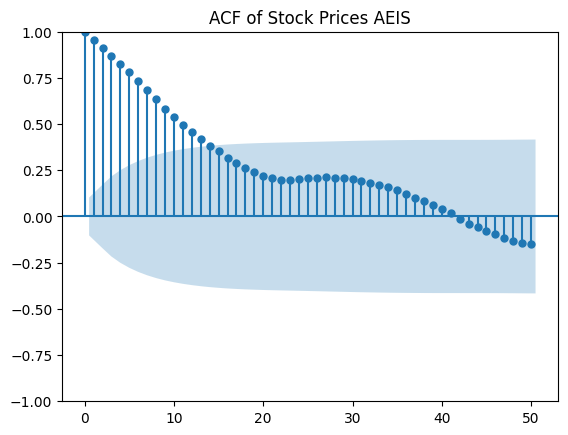

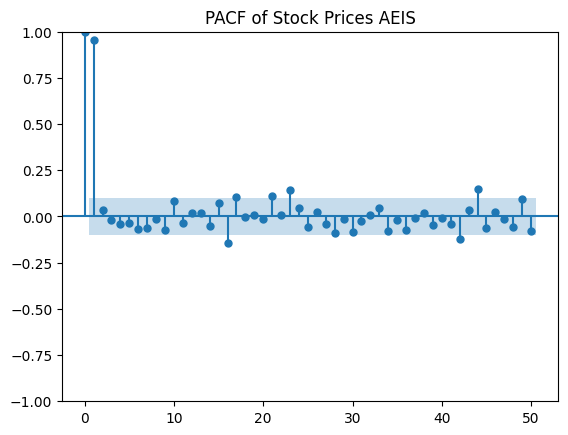

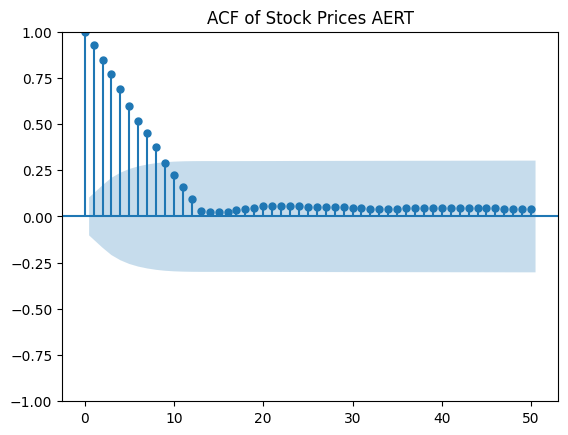

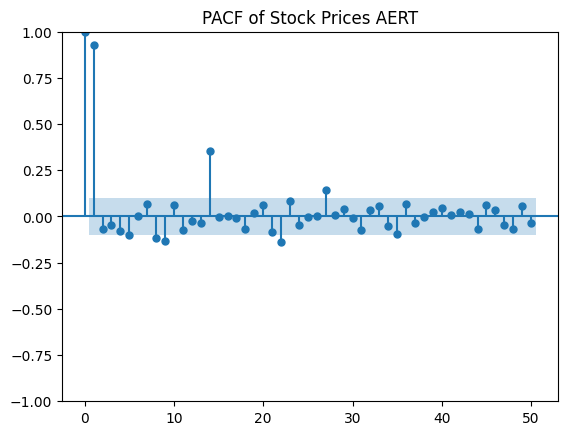

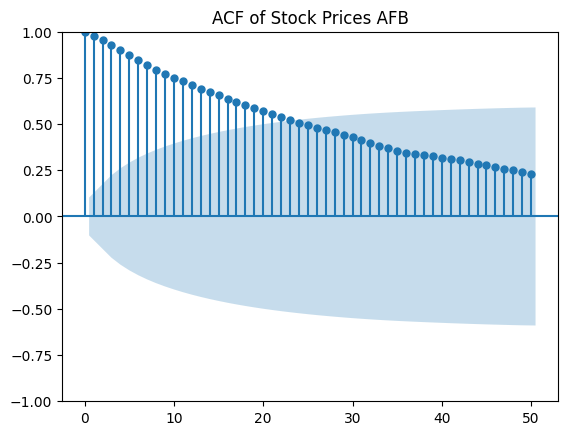

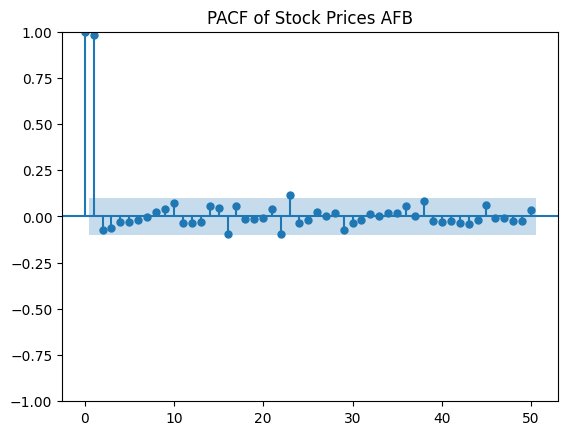

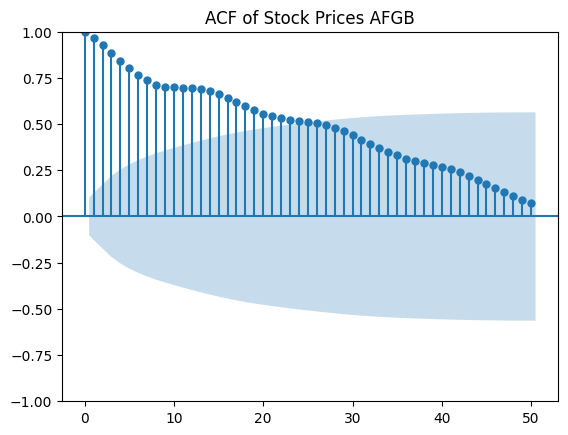

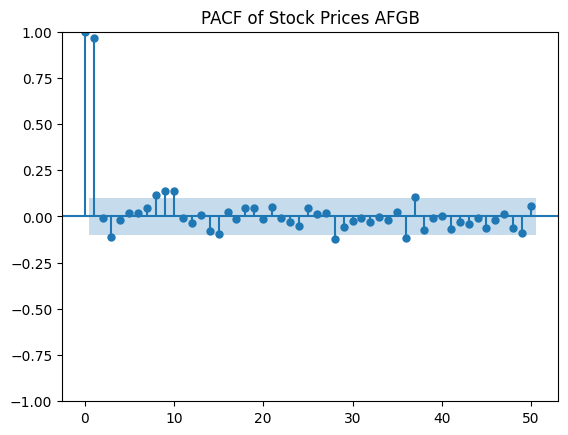

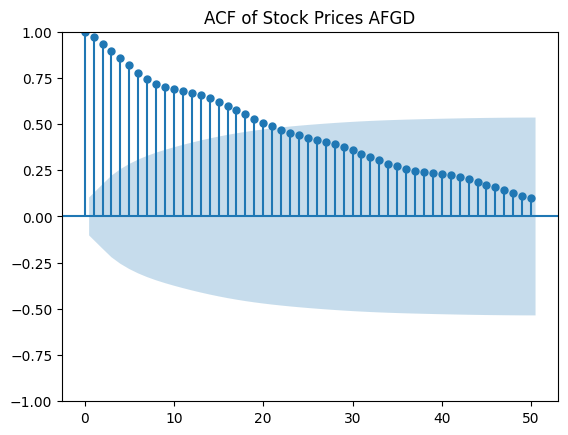

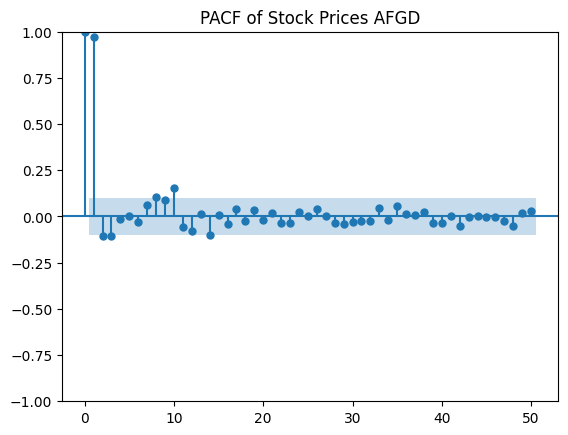

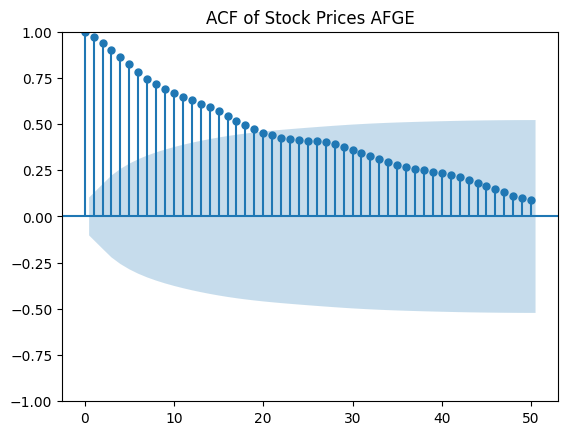

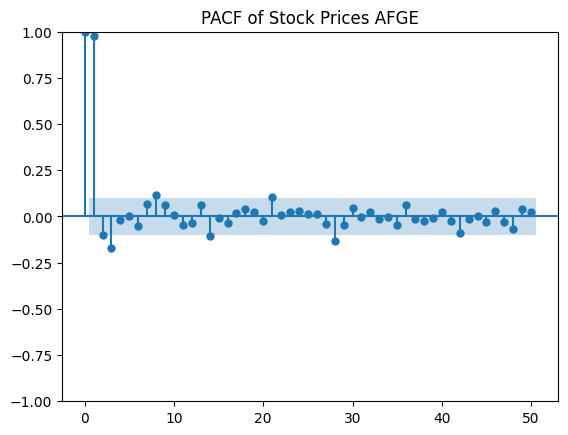

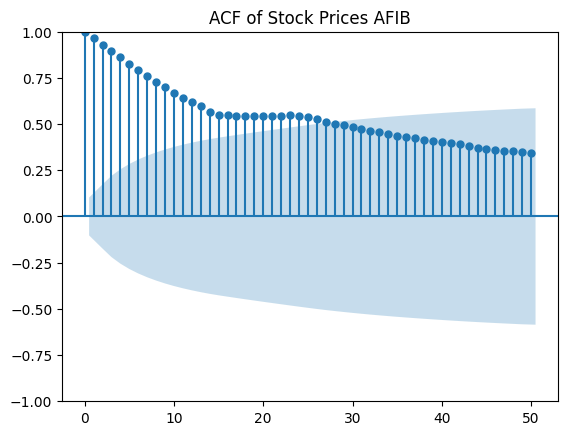

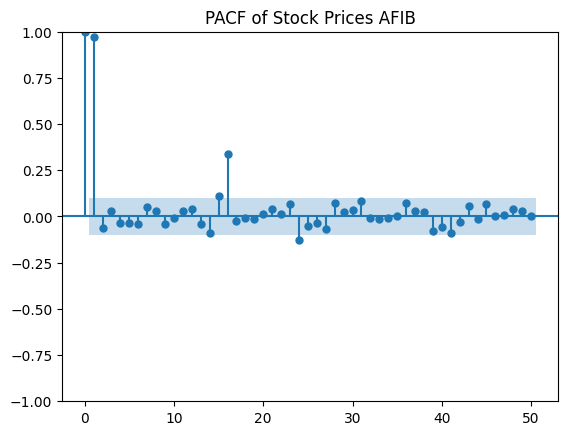

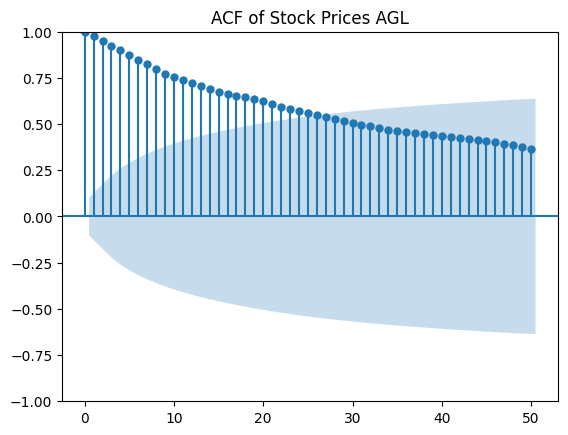

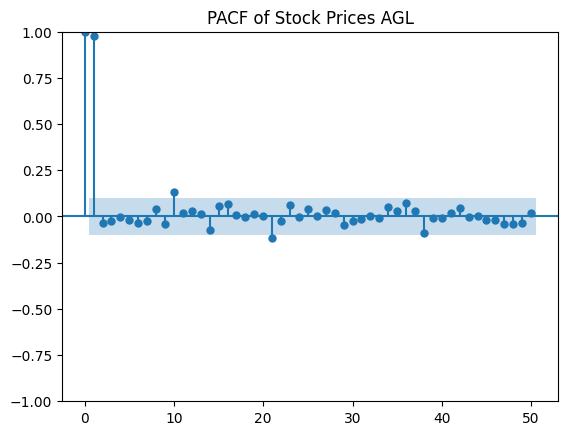

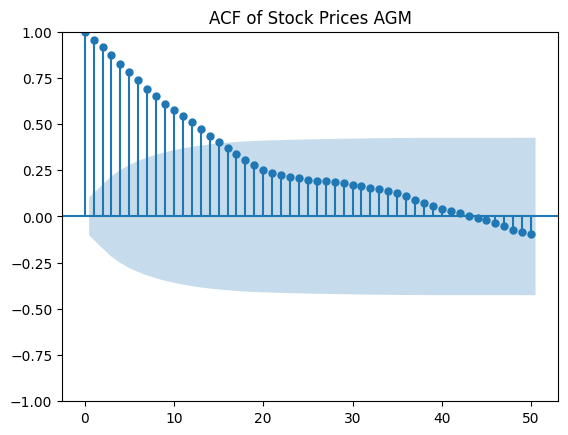

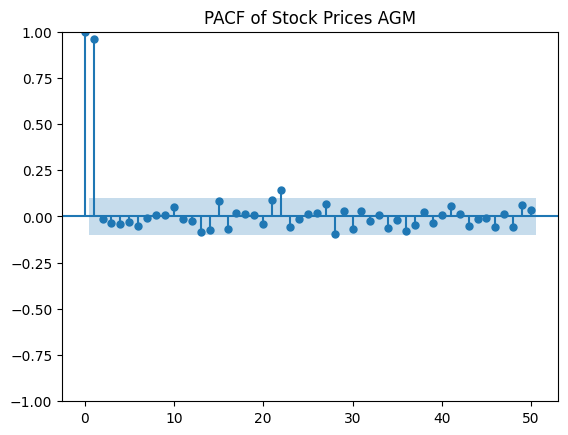

In [146]:
stationarity_dict = {}
kpss_dict = {}

for column in stock.columns:
    stationarity_dict[column] = is_stationary(stock[column])
    kpss_dict[column] = kpss_test(stock[column])

adf_stationarity = pd.DataFrame(list(stationarity_dict.items()), columns=['Stock', 'Stationary'])
kpss_stationarity = pd.DataFrame(list(kpss_dict.items()), columns=['Stock', 'Stationary'])
stationarity_prob = adf_stationarity.merge(kpss_stationarity, on='Stock')
stationarity = stationarity_prob[(stationarity_prob['Stationary_x'] == True) & (stationarity_prob['Stationary_y'] == True)]

acf_df = pd.DataFrame()
pacf_df = pd.DataFrame()

for column in stock[stationarity[stationarity['Stationary_x'] == True]['Stock'][:20]]:
    acf_values = calculate_acf(stock[column])
    acf_df[column] = acf_values
    pacf_values = calculate_pacf(stock[column])
    pacf_df[column] = pacf_values
    plot_acf(stock[column], lags=50)
    plt.title(f'ACF of Stock Prices {column}')
    plt.show()
    plot_pacf(stock[column], lags=50)
    plt.title(f'PACF of Stock Prices {column}')
    plt.show()

#display(acf_df.head())
#display(pacf_df.head())


Выше мы построили ACF и PACF только по стационарным рядам, который мы выбрали сиходя из теста ADF и KPSS тестов, но, как и в валютных парах нам виднеется ситуация, когда наши тесты дают ложноположительные результаты и ряды, на самом деле, не являются стационарными. Поэтому дальше постараемся применить метод деффиринцирования 

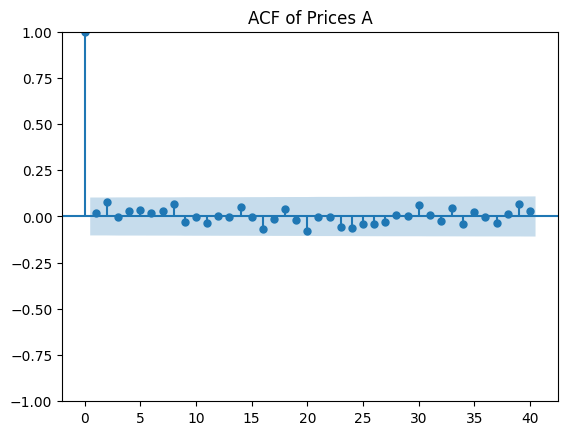

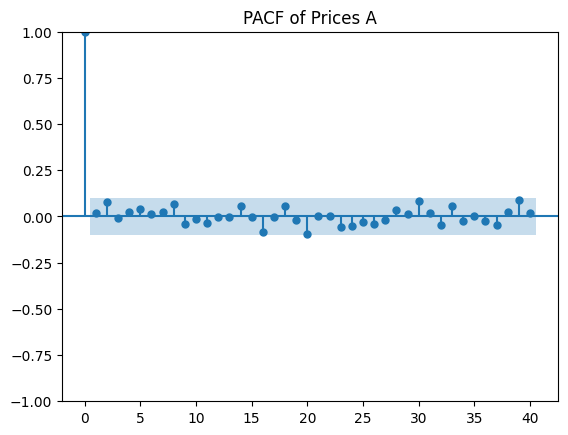

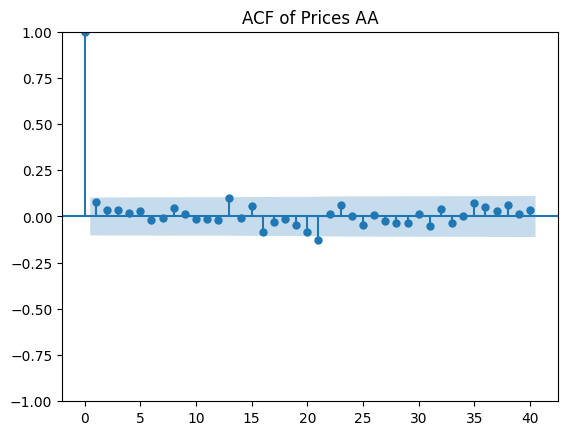

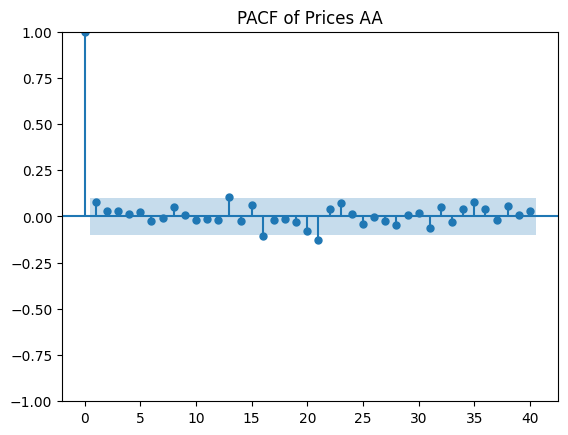

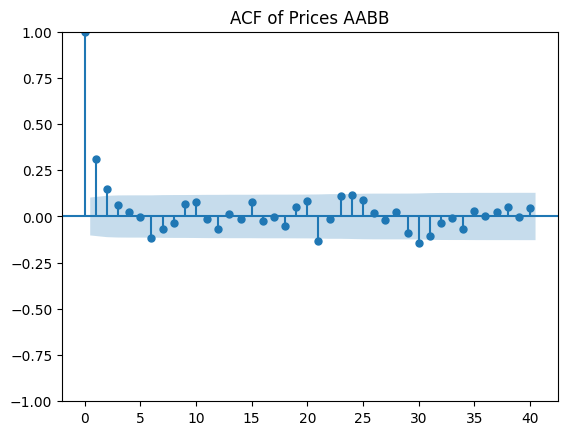

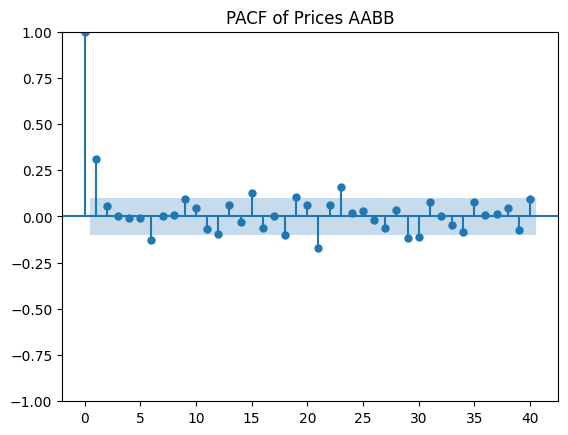

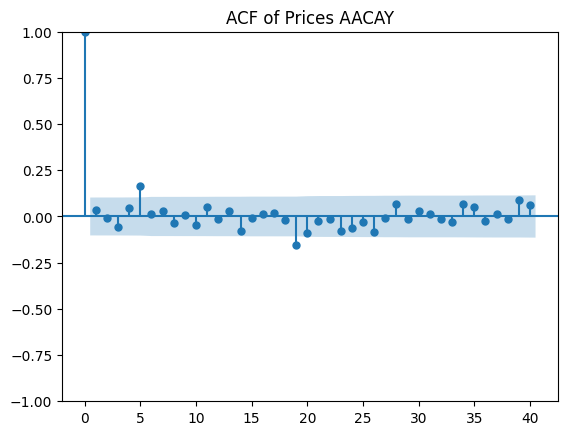

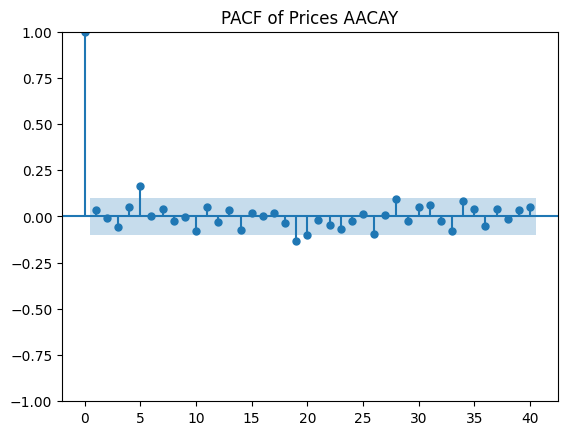

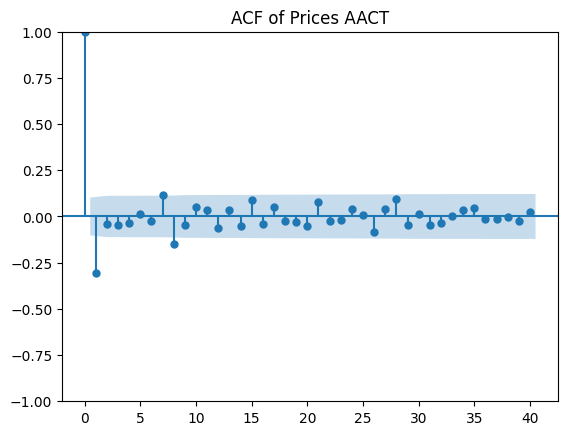

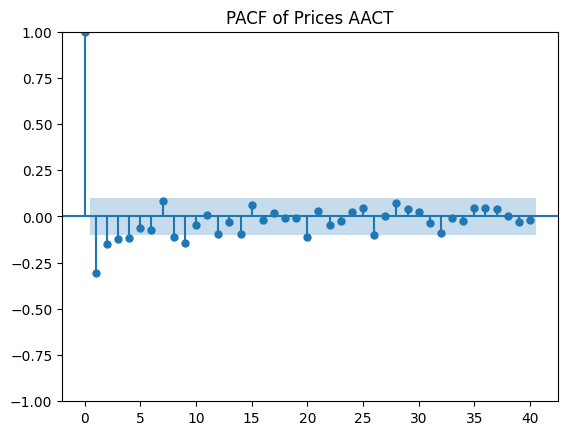

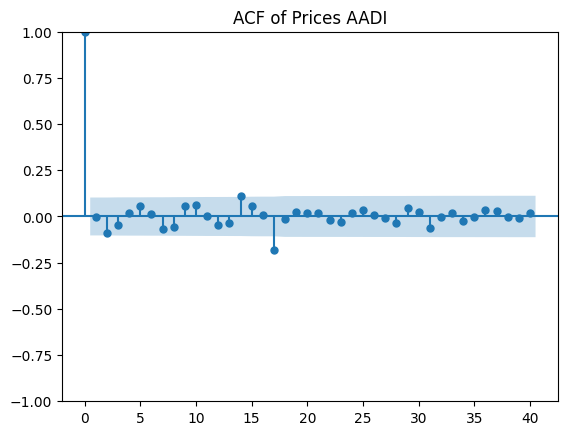

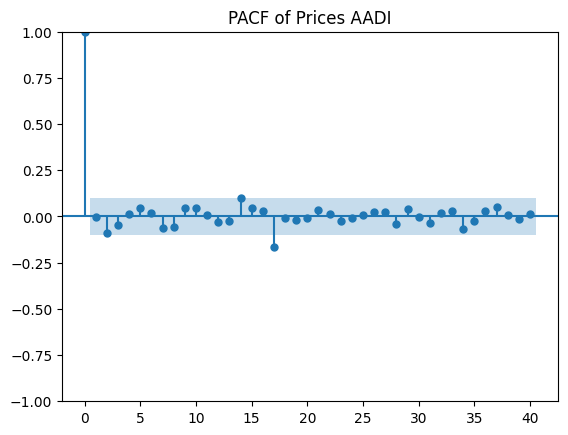

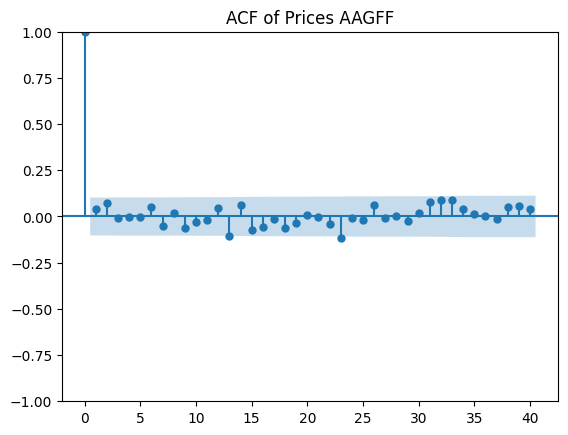

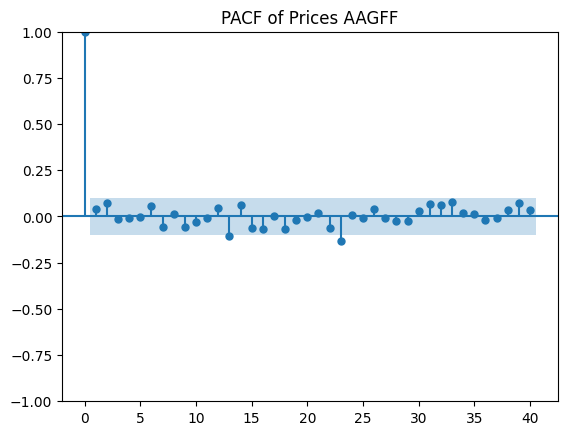

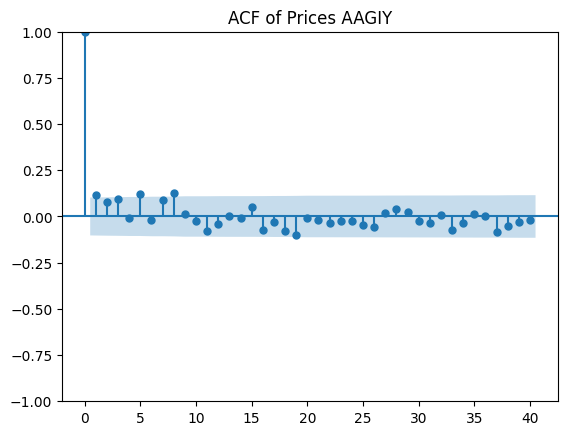

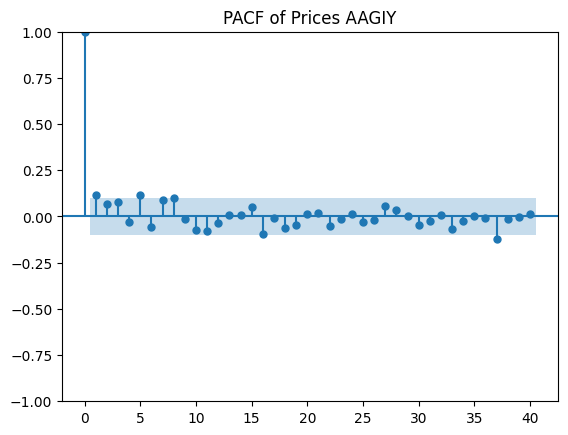

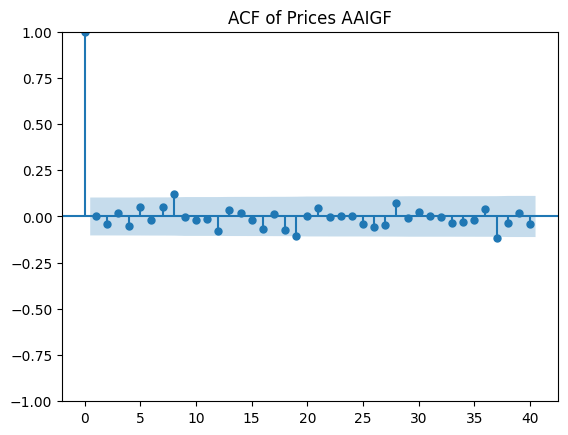

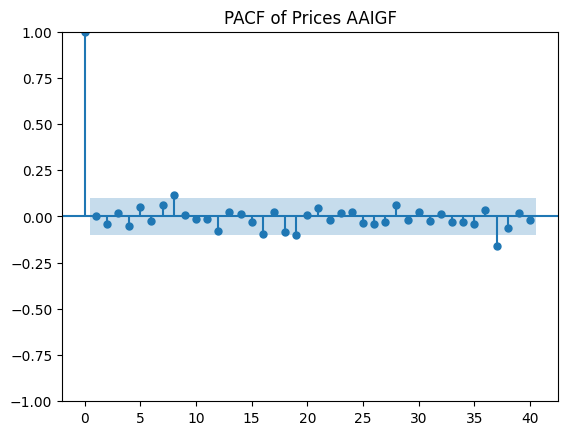

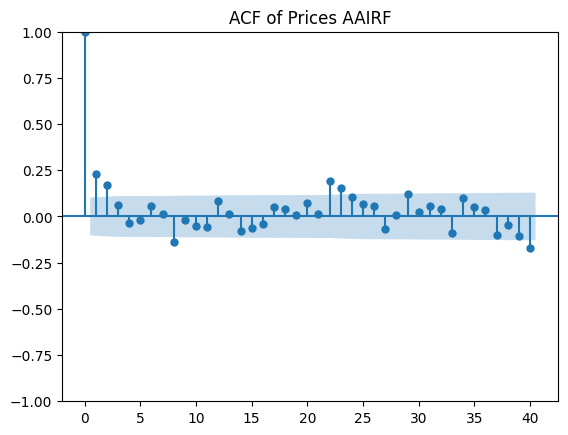

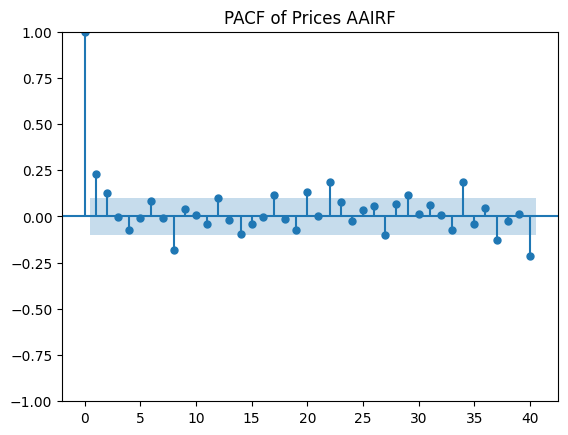

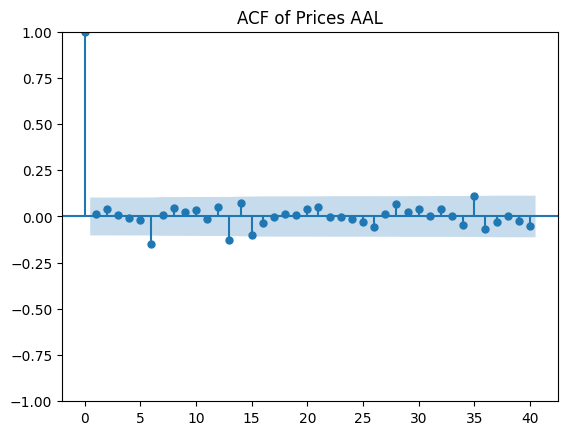

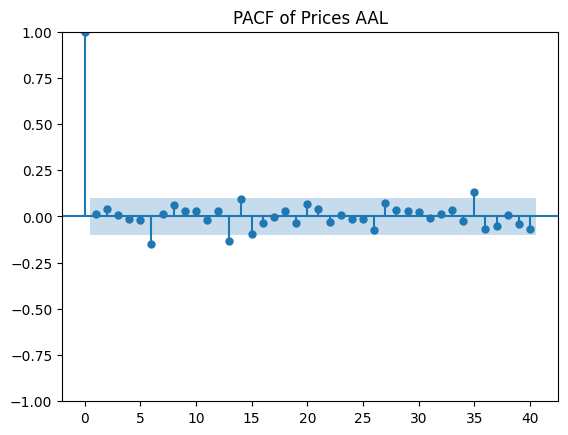

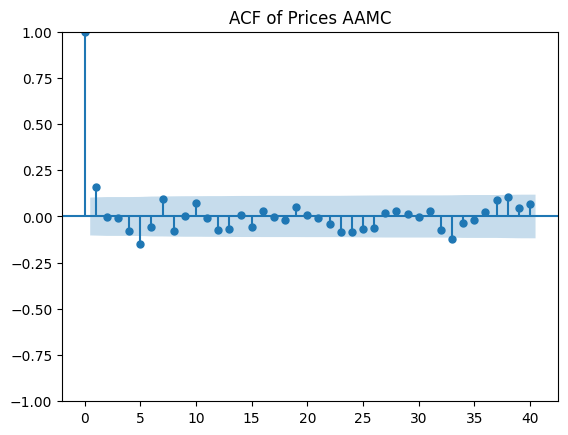

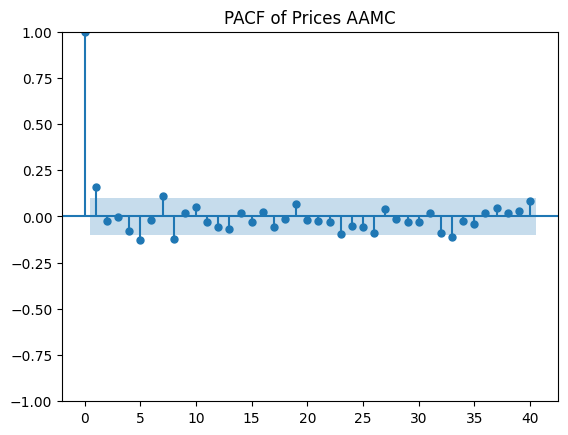

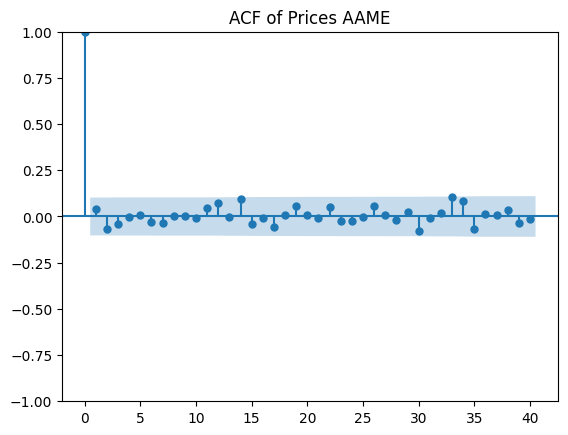

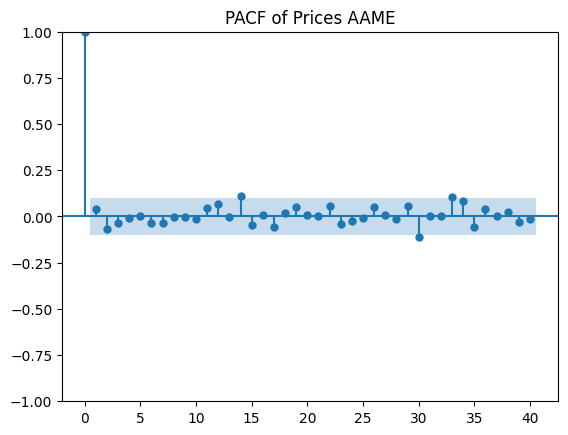

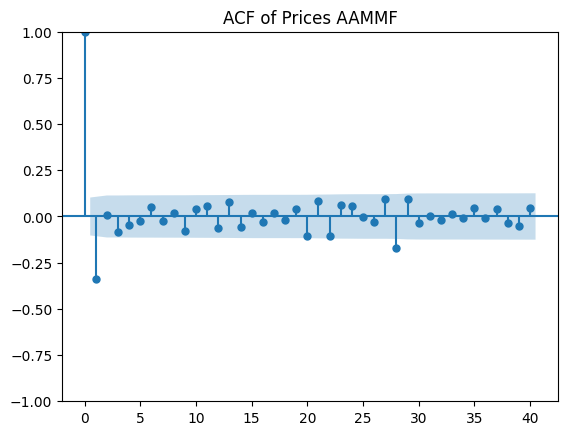

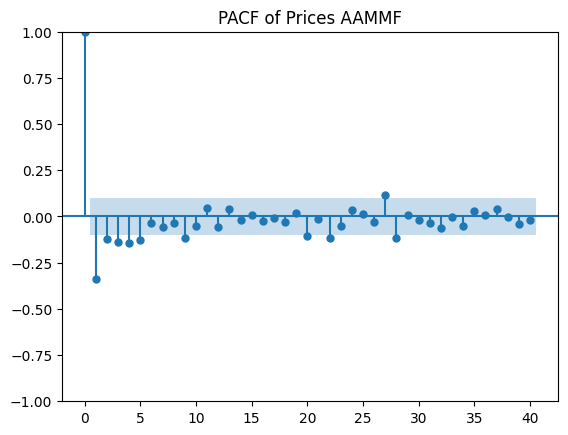

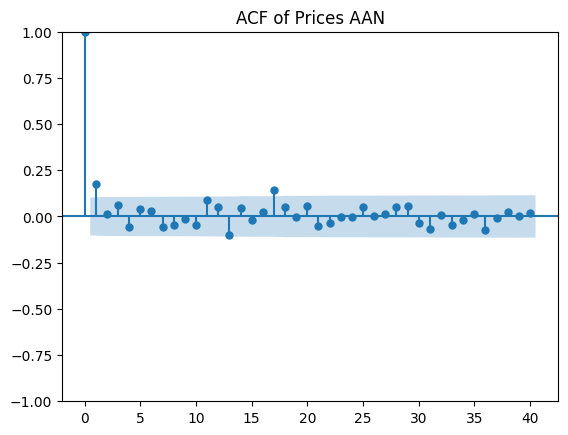

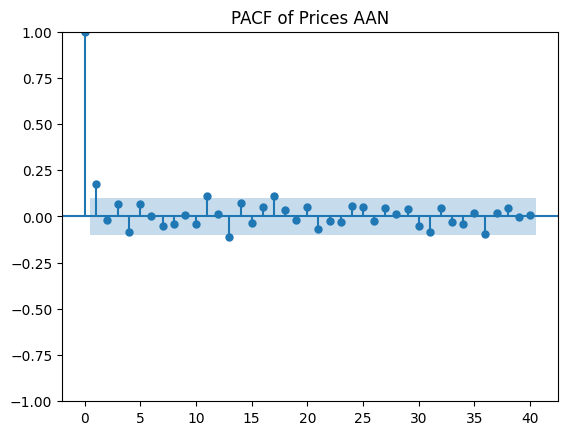

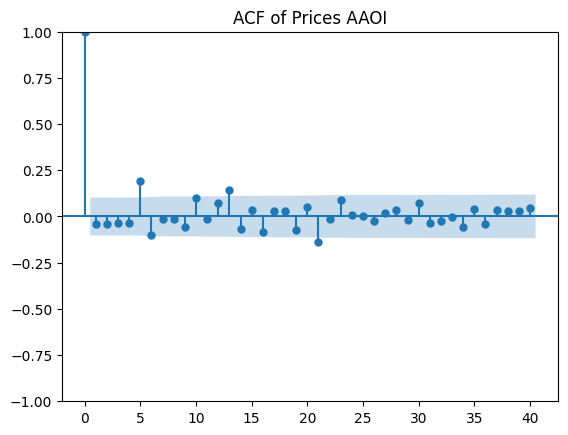

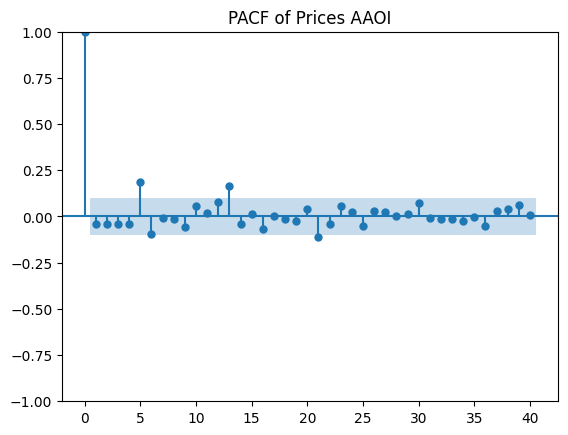

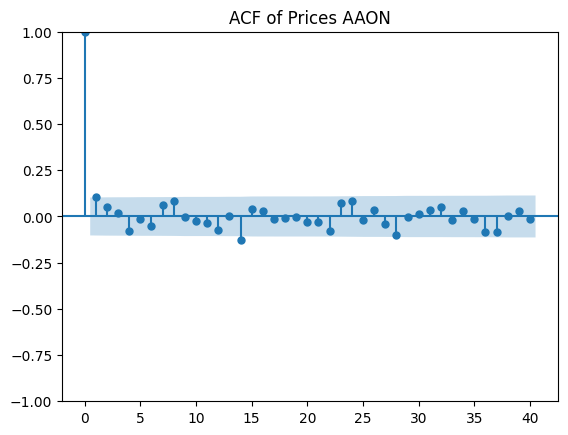

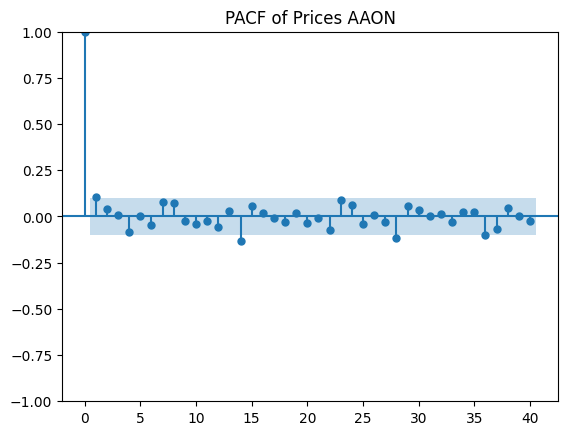

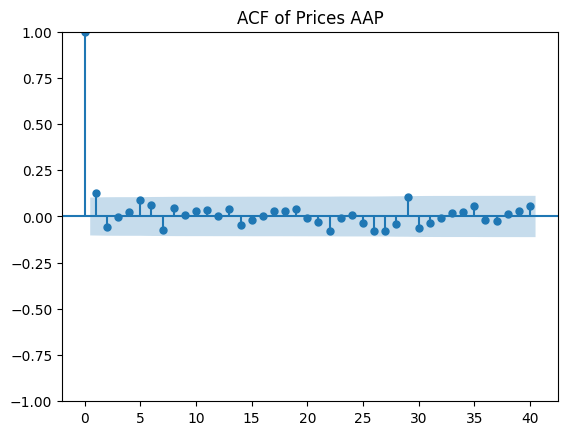

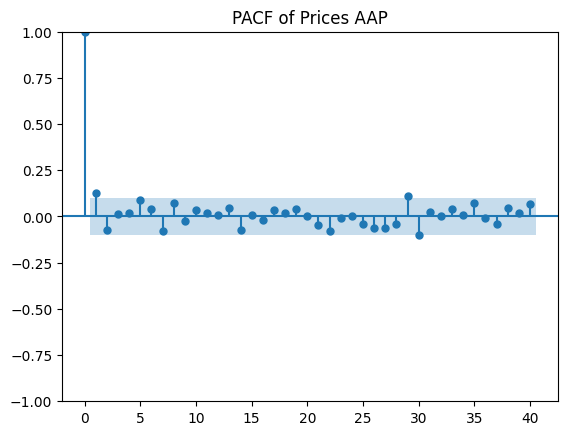

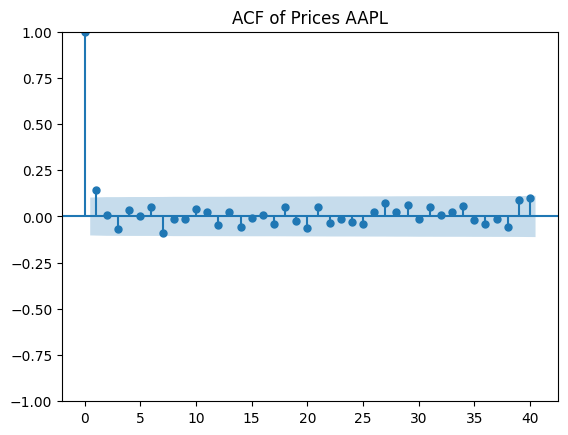

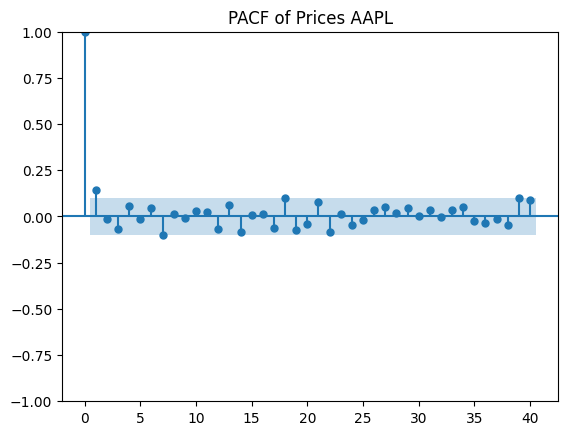

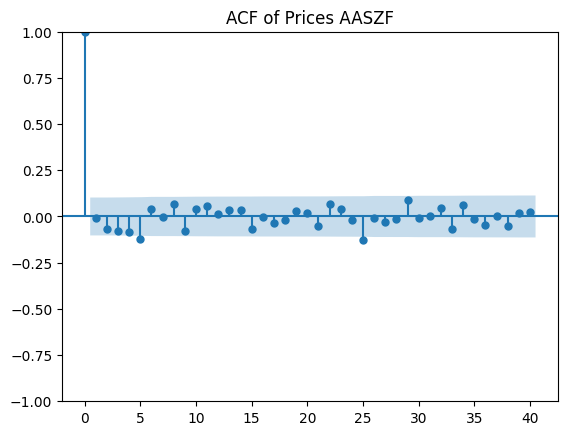

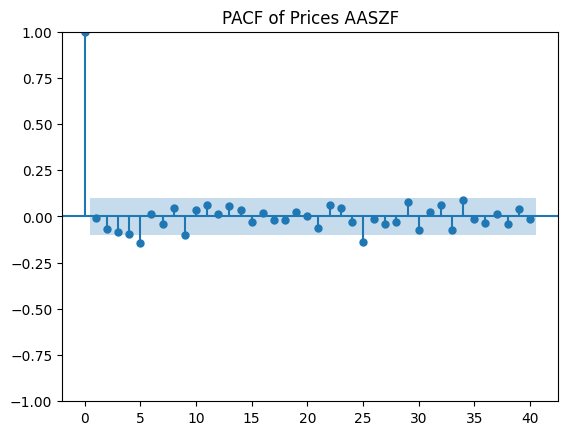

In [145]:
differencing_dict = {}
differencing_df = pd.DataFrame()

for column in stock.columns:
    differencing_df[column] = differencing(stock[column])
    differencing_dict[column] = is_stationary(differencing(stock[column]))

differencing_dict = pd.DataFrame(list(differencing_dict.items()), columns=['Stock', 'Stationary_ADF_diff'])


acf_df = pd.DataFrame()
pacf_df = pd.DataFrame()

for column in stock.columns[:20]:
    acf_values = calculate_acf(differencing_df[column])
    acf_df[column] = acf_values
    pacf_values = calculate_pacf(differencing_df[column])
    pacf_df[column] = pacf_values
    plot_acf(differencing_df[column], lags=40)
    plt.title(f'ACF of Prices {column}')
    plt.show()
    plot_pacf(differencing_df[column], lags=40)
    plt.title(f'PACF of Prices {column}')
    plt.show()

### Вывод

Метод приведения временного ряда к стационарному виду показал хороший результат и на данных акций, что говорит нам о том, для построения последущих прогнозных моделей и их оптимизаций со стороны поисков наиболее оптимальных лагов необходимо его использовать для улучшения качества модели на валютных парах и акций